# Llamar a las librerias y .cvs

In [179]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore

In [180]:
datos_canciones = pd.read_csv('song_data.csv')
region = pd.read_csv('country_data.csv')
votos = pd.read_csv('votes.csv')
codigo_pais = pd.read_csv('Countries.csv')

# Exploración de datos

In [181]:
# Número de filas y columnas
print("datos de canciones:") 
datos_canciones.shape

datos de canciones:


(528, 41)

In [182]:
# Info del dataset
datos_canciones.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 528 entries, 0 to 527
Data columns (total 41 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   year                   528 non-null    int64 
 1   semi_draw_position     528 non-null    object
 2   final_draw_position    528 non-null    object
 3   country                528 non-null    object
 4   artist_name            528 non-null    object
 5   song_name              528 non-null    object
 6   language               528 non-null    object
 7   style                  528 non-null    object
 8   direct_qualifier_10    528 non-null    object
 9   gender                 528 non-null    object
 10  main_singers           528 non-null    int64 
 11  age                    528 non-null    object
 12  selection              528 non-null    object
 13  key                    528 non-null    object
 14  BPM                    528 non-null    object
 15  energy                 

In [183]:
# Qué tipos de datos hay (mirar todas las columnas)
pd.options.display.max_columns = None
datos_canciones.head(n=3)

year semi_draw_position final_draw_position    country    artist_name  \
0  2022                  1                   -    Albania  Ronela Hajati   
1  2022                  2                   -     Latvia      Citi Zeni   
2  2022                  3                  14  Lithuania     Monika Liu   

        song_name           language   style direct_qualifier_10  gender  \
0          Sekret  Albanian, English     Pop                   -  Female   
1  Eat Your Salad            English     Pop                   -    Male   
2     Sentimentai         Lithuanian  Ballad                   0  Female   

   main_singers      age selection      key  BPM energy danceability  \
0             1  unknown   unknown  F Minor  100     70           76   
1             1  unknown   unknown  B Minor  115     69           75   
2             1  unknown   unknown  C Major   93     56           68   

  happiness loudness acousticness instrumentalness liveness speechiness  \
0        45    -6 dB            5                0       52           5   
1        59    -8 dB            1                0       34          17   
2        50    -8 dB            9                0       31           3   

  release_date key_change_10  backing_dancers  backing_singers  \
0      unknown       unknown                5                0   
1      unknown       unknown                0                0   
2      unknown       unknown                0                0   

   backing_instruments  instrument_10 qualified final_televote_points  \
0                    0              0         0                     -   
1                    4              0         0                     -   
2                    0              0         1                    93   

  final_jury_points final_televote_votes final_jury_votes final_place  \
0                 -                    -                -           -   
1                 -                    -                -           -   
2                35                   21               10          14   

  final_total_points semi_place semi_total_points  favourite_10     race  \
0                  -         12                58             0  unknown   
1                  -         14                55             0  unknown   
2                128          7               159             0  unknown   

   host_10  
0        0  
1        0  
2        0

In [184]:
region.info

<bound method DataFrame.info of                  country          region
0                Albania  Eastern Europe
1                 Latvia  Eastern Europe
2              Lithuania  Eastern Europe
3            Switzerland  Western Europe
4               Slovenia  Eastern Europe
5                Ukraine  Eastern Europe
6               Bulgaria  Eastern Europe
7            Netherlands  Western Europe
8                Moldova  Eastern Europe
9               Portugal  Western Europe
10               Croatia  Eastern Europe
11               Denmark     Scandanavia
12               Austria  Eastern Europe
13               Iceland     Scandanavia
14                Greece  Eastern Europe
15                Norway     Scandanavia
16               Armenia  Eastern Europe
17               Finland     Scandanavia
18                Israel   Out of Europe
19                Serbia  Eastern Europe
20            Azerbaijan   Out of Europe
21               Georgia   Out of Europe
22                 Malta 

In [185]:
region.head(n=3)

country          region
0    Albania  Eastern Europe
1     Latvia  Eastern Europe
2  Lithuania  Eastern Europe

In [186]:
votos.info

<bound method DataFrame.info of        year         round from_country_id to_country_id from_country  \
0      1957         final              at            nl           at   
1      1957         final              at            fr           at   
2      1957         final              at            dk           at   
3      1957         final              at            lu           at   
4      1957         final              at            de           at   
...     ...           ...             ...           ...          ...   
47002  2019  semi-final-2              gb            hr           gb   
47003  2019  semi-final-2              gb            lv           gb   
47004  2019  semi-final-2              gb            am           gb   
47005  2019  semi-final-2              gb            at           gb   
47006  2019  semi-final-2              gb            ie           gb   

      to_country  total_points  tele_points  jury_points  
0             nl             6          NaN 

In [187]:
votos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47007 entries, 0 to 47006
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   year             47007 non-null  int64  
 1   round            47007 non-null  object 
 2   from_country_id  47007 non-null  object 
 3   to_country_id    47007 non-null  object 
 4   from_country     47007 non-null  object 
 5   to_country       47007 non-null  object 
 6   total_points     47007 non-null  int64  
 7   tele_points      7394 non-null   float64
 8   jury_points      7394 non-null   float64
dtypes: float64(2), int64(2), object(5)
memory usage: 3.2+ MB


In [188]:
votos.head(n=3)

year  round from_country_id to_country_id from_country to_country  \
0  1957  final              at            nl           at         nl   
1  1957  final              at            fr           at         fr   
2  1957  final              at            dk           at         dk   

   total_points  tele_points  jury_points  
0             6          NaN          NaN  
1             0          NaN          NaN  
2             0          NaN          NaN

# Tratamiento de datos

Se borran las columnas y filas que no interesen.

In [189]:
# Quitamos los datos de las canciones
datos_canciones = datos_canciones.drop(['semi_draw_position', 'release_date', 'key_change_10', 'age', 'selection', 'semi_place', 'semi_total_points', 'race'], axis=1)

# Quitamos las columnas repetidas
votos = votos.drop(['from_country_id', 'to_country_id'], axis=1)

In [190]:
datos_canciones.head(n=3)

year final_draw_position    country    artist_name       song_name  \
0  2022                   -    Albania  Ronela Hajati          Sekret   
1  2022                   -     Latvia      Citi Zeni  Eat Your Salad   
2  2022                  14  Lithuania     Monika Liu     Sentimentai   

            language   style direct_qualifier_10  gender  main_singers  \
0  Albanian, English     Pop                   -  Female             1   
1            English     Pop                   -    Male             1   
2         Lithuanian  Ballad                   0  Female             1   

       key  BPM energy danceability happiness loudness acousticness  \
0  F Minor  100     70           76        45    -6 dB            5   
1  B Minor  115     69           75        59    -8 dB            1   
2  C Major   93     56           68        50    -8 dB            9   

  instrumentalness liveness speechiness  backing_dancers  backing_singers  \
0                0       52           5                5                0   
1                0       34          17                0                0   
2                0       31           3                0                0   

   backing_instruments  instrument_10 qualified final_televote_points  \
0                    0              0         0                     -   
1                    4              0         0                     -   
2                    0              0         1                    93   

  final_jury_points final_televote_votes final_jury_votes final_place  \
0                 -                    -                -           -   
1                 -                    -                -           -   
2                35                   21               10          14   

  final_total_points  favourite_10  host_10  
0                  -             0        0  
1                  -             0        0  
2                128             0        0

In [191]:
votos.head(n=3)

year  round from_country to_country  total_points  tele_points  jury_points
0  1957  final           at         nl             6          NaN          NaN
1  1957  final           at         fr             0          NaN          NaN
2  1957  final           at         dk             0          NaN          NaN

Se traducen los códigos de los paises

In [192]:
# Se fusionan los datasets utilizando la columna "country_code"
votos = pd.merge(votos, codigo_pais, left_on='from_country', right_on='country_code')
votos = pd.merge(votos, codigo_pais, left_on='to_country', right_on='country_code')

# Se eliminan las columnas que no se van a usar
votos.drop(['from_country', 'to_country', 'country_code_x', 'country_code_y'], axis=1, inplace=True)

# Se renombran las columnas para que queden con los nombres originales
votos.rename(columns={'country_name_x': 'From', 'country_name_y': 'To'}, inplace=True)


In [193]:
votos.head()

year  round  total_points  tele_points  jury_points     From           To
0  1957  final             6          NaN          NaN  Austria  Netherlands
1  1958  final             0          NaN          NaN  Austria  Netherlands
2  1959  final             3          NaN          NaN  Austria  Netherlands
3  1960  final             0          NaN          NaN  Austria  Netherlands
4  1961  final             0          NaN          NaN  Austria  Netherlands

Se el dataset de las regiones con los otros dos y se renombran los datasets finales para economizar el código.

In [194]:
# Se unen los datasets de los datos de las canciones y las regiones
df1 = pd.merge(datos_canciones, region, on='country')

# Agregar la columna "region" al "from_country" y se renombra
votos = pd.merge(votos, region[['country', 'region']], how='left', left_on='From', right_on='country')
votos.drop(['country'], axis=1, inplace=True)
votos.rename(columns={'region': 'From_region'}, inplace=True)

# Agregar la columna "region" al "to_country" y se renombra
votos = pd.merge(votos, region[['country', 'region']], how='left', left_on='To', right_on='country')
votos.drop(['country'], axis=1, inplace=True)
votos.rename(columns={'region': 'To_region'}, inplace=True)

df2 = votos


In [195]:
df1.head()

year final_draw_position  country        artist_name     song_name  \
0  2022                   -  Albania      Ronela Hajati        Sekret   
1  2021                   2  Albania  Anxhela Peristeri         Karma   
2  2019                   2  Albania      Jonida Maliqi  Ktheju tokes   
3  2018                  12  Albania    Eugent Bushpepa          Mall   
4  2017                   -  Albania            Lindita         World   

            language        style direct_qualifier_10  gender  main_singers  \
0  Albanian, English          Pop                   -  Female             1   
1           Albanian       Ballad                   0  Female             1   
2           Albanian  Traditional                   0  Female             1   
3           Albanian         Rock                   0    Male             4   
4            English          Pop                   -  Female             1   

        key  BPM energy danceability happiness loudness acousticness  \
0   F Minor  100     70           76        45    -6 dB            5   
1   G Minor  150     63           52        19   -10 dB            0   
2  Db Major  117     70           57        58     6 dB            2   
3   E Major   95     76           39        41     6 dB            0   
4   C Major   85     77           42        30     5 dB           14   

  instrumentalness liveness speechiness  backing_dancers  backing_singers  \
0                0       52           5                5                0   
1                0       13           4                0                0   
2                0       21           5                0                3   
3               79       12           3                0                2   
4                0       29           4                0                4   

   backing_instruments  instrument_10 qualified final_televote_points  \
0                    0              0         0                     -   
1                    0              0         1                    35   
2                    0              0         1                    47   
3                    3              0         1                    58   
4                    0              0         0                     -   

  final_jury_points final_televote_votes final_jury_votes final_place  \
0                 -                    -                -           -   
1                22                    5                4          21   
2                43                    6               10          17   
3               126                    8               20          11   
4                 -                    -                -           -   

  final_total_points  favourite_10  host_10          region  
0                  -             0        0  Eastern Europe  
1                 57             0        0  Eastern Europe  
2                 90             0        0  Eastern Europe  
3                184             0        0  Eastern Europe  
4                  -             0        0  Eastern Europe

Como los puntos de cada año tienen un valor relativo ya que cada año cambia, vamos a crear una columna que agrupe el total de puntos de cada año, así como otra que calcule el valor relativo (puntos finales / puntos totales por año)

In [196]:
# Se transforman los strings "-" en NaN
df1['final_total_points'] = pd.to_numeric(df1['final_total_points'], errors='coerce')

# Se agrupa y crea la columna de total de puntos de cada año
df1['tppyear'] = df1.groupby('year')['final_total_points'].transform('sum')
df1['rv'] = df1['final_total_points'] / df1['tppyear']

# Transformar los NaN en "-"
df1['final_total_points'] = df1['final_total_points'].fillna('-')
df1['rv'] = df1['rv'].fillna('-')
df1.head(n=3)


year final_draw_position  country        artist_name     song_name  \
0  2022                   -  Albania      Ronela Hajati        Sekret   
1  2021                   2  Albania  Anxhela Peristeri         Karma   
2  2019                   2  Albania      Jonida Maliqi  Ktheju tokes   

            language        style direct_qualifier_10  gender  main_singers  \
0  Albanian, English          Pop                   -  Female             1   
1           Albanian       Ballad                   0  Female             1   
2           Albanian  Traditional                   0  Female             1   

        key  BPM energy danceability happiness loudness acousticness  \
0   F Minor  100     70           76        45    -6 dB            5   
1   G Minor  150     63           52        19   -10 dB            0   
2  Db Major  117     70           57        58     6 dB            2   

  instrumentalness liveness speechiness  backing_dancers  backing_singers  \
0                0       52           5                5                0   
1                0       13           4                0                0   
2                0       21           5                0                3   

   backing_instruments  instrument_10 qualified final_televote_points  \
0                    0              0         0                     -   
1                    0              0         1                    35   
2                    0              0         1                    47   

  final_jury_points final_televote_votes final_jury_votes final_place  \
0                 -                    -                -           -   
1                22                    5                4          21   
2                43                    6               10          17   

  final_total_points  favourite_10  host_10          region  tppyear        rv  
0                  -             0        0  Eastern Europe   4640.0         -  
1               57.0             0        0  Eastern Europe   4108.0  0.013875  
2               90.0             0        0  Eastern Europe   4756.0  0.018923

In [197]:
counts = df1['gender'].value_counts()
print(counts)


Female    256
Male      222
Mix        45
Name: gender, dtype: int64


In [198]:

# Convierte la columna 'total_points' a tipo numérico
df1['final_total_points'] = pd.to_numeric(df1['final_total_points'], errors='coerce')

# Calcula la suma de los puntos por año
total_points_year = df1.groupby('year')['final_total_points'].sum()

# Crea una nueva columna con los puntos relativos
df1['relative_points'] = df1['final_total_points'] / df1['year'].map(total_points_year)


In [199]:
df2.head()

year  round  total_points  tele_points  jury_points     From           To  \
0  1957  final             6          NaN          NaN  Austria  Netherlands   
1  1958  final             0          NaN          NaN  Austria  Netherlands   
2  1959  final             3          NaN          NaN  Austria  Netherlands   
3  1960  final             0          NaN          NaN  Austria  Netherlands   
4  1961  final             0          NaN          NaN  Austria  Netherlands   

      From_region       To_region  
0  Eastern Europe  Western Europe  
1  Eastern Europe  Western Europe  
2  Eastern Europe  Western Europe  
3  Eastern Europe  Western Europe  
4  Eastern Europe  Western Europe

In [200]:
# Buscar valores nulos
null_df2 = df2.isnull().sum()
null_df2

year                0
round               0
total_points        0
tele_points     38648
jury_points     38648
From                0
To                  0
From_region         0
To_region           0
dtype: int64

In [239]:
# Se sustituyen los nulos por 0
df2 = df2.fillna(0)
df1 = df1.fillna('-')

In [202]:
counts = df1['language'].value_counts()


In [203]:
# Se transforman la variable language en las canciones donde se use el inglés como segundo idioma
df1.loc[df1['language'].str.startswith('English,'), 'language'] = 'English mix'
df1.loc[df1['language'].str.endswith(' English'), 'language'] = 'English mix'



# Representaciones gráficas

Datos de las canciones de 2009 a 2019

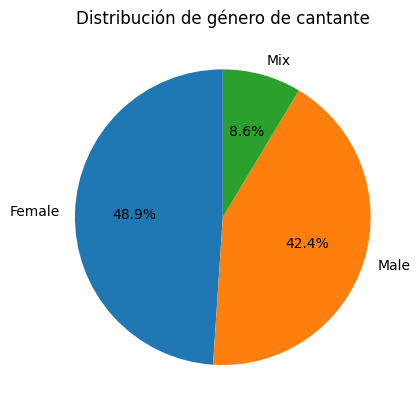

In [204]:
counts = df1['gender'].value_counts()
plt.pie(counts, labels=counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de género de cantante')
plt.show()

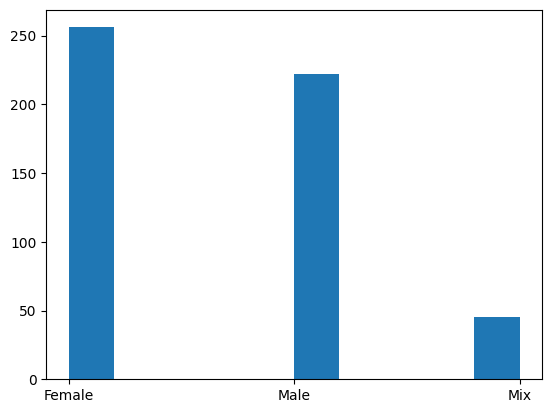

In [205]:
fig, ax = plt.subplots()
ax.hist(df1["gender"])
plt.show()

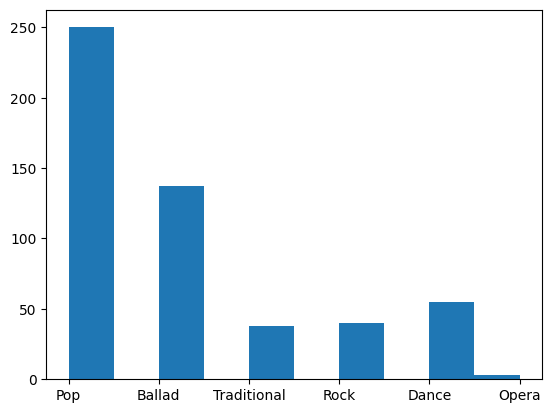

In [206]:
fig, ax = plt.subplots()
ax.hist(df1["style"])
plt.show()

C:\Users\xergi\AppData\Roaming\Python\Python37\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


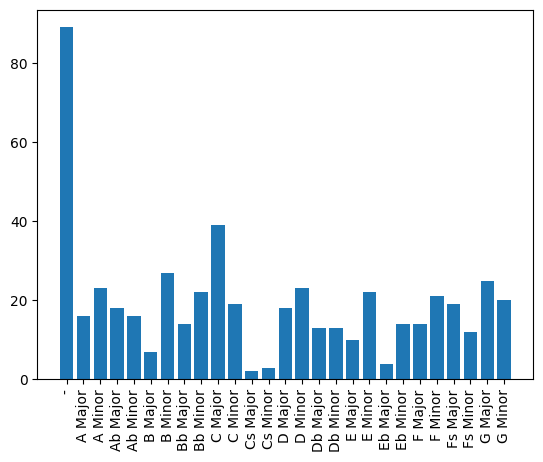

In [207]:
# Contar las variables key
counts = df1.groupby('key').size()
# Crear gráficos
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values)
ax.set_xticklabels(counts.index, rotation=90)
plt.show()

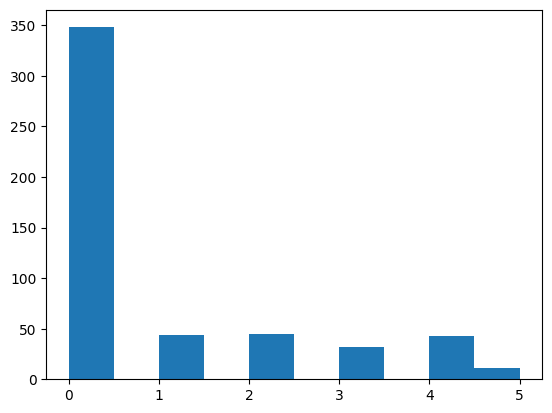

In [208]:
fig, ax = plt.subplots()
ax.hist(df1["backing_dancers"])
plt.show()

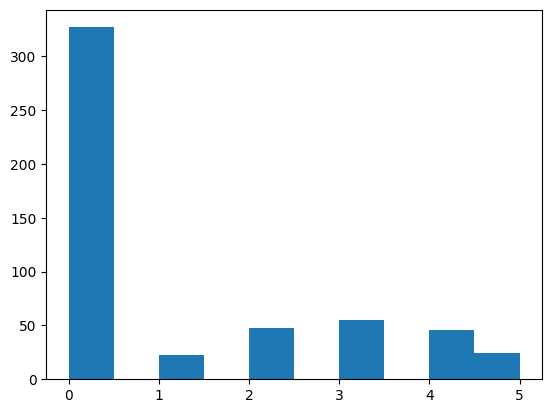

In [209]:
fig, ax = plt.subplots()
ax.hist(df1["backing_singers"])
plt.show()

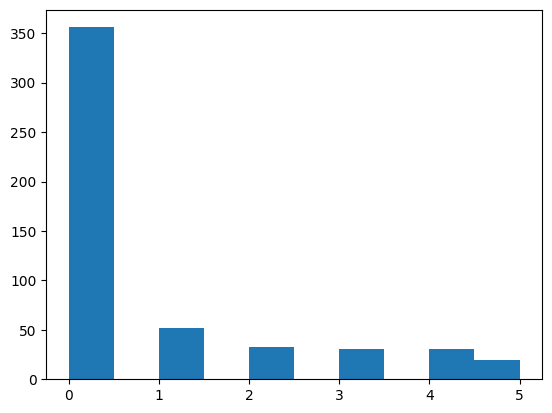

In [210]:
fig, ax = plt.subplots()
ax.hist(df1["backing_instruments"])
plt.show()

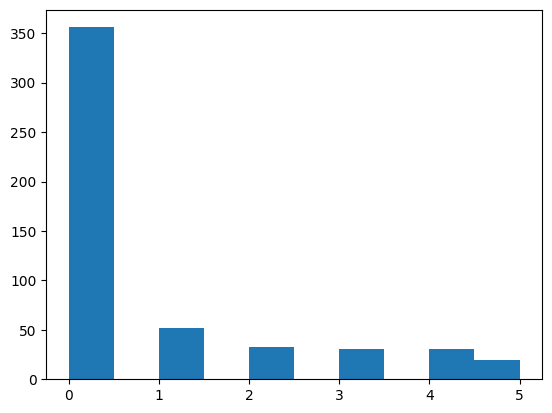

In [211]:
fig, ax = plt.subplots()
ax.hist(df1["backing_instruments"])
plt.show()

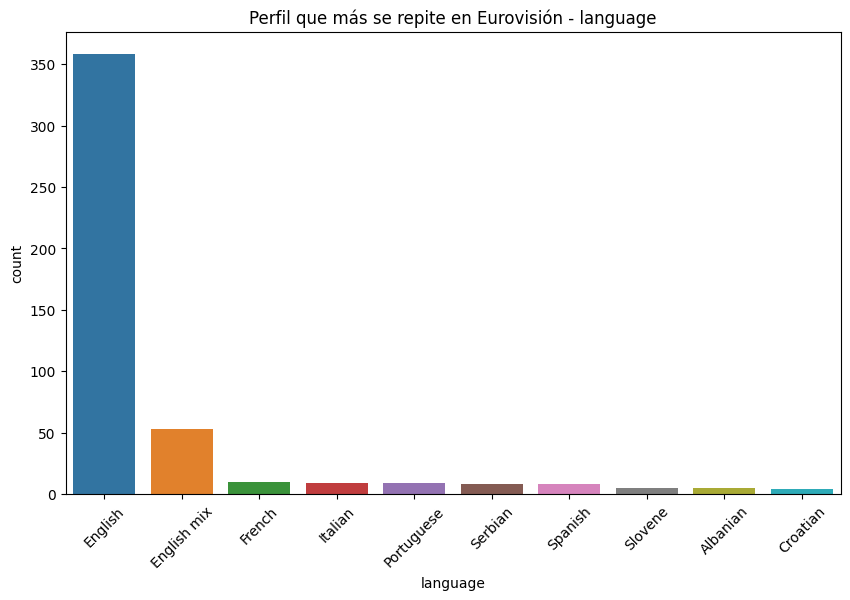

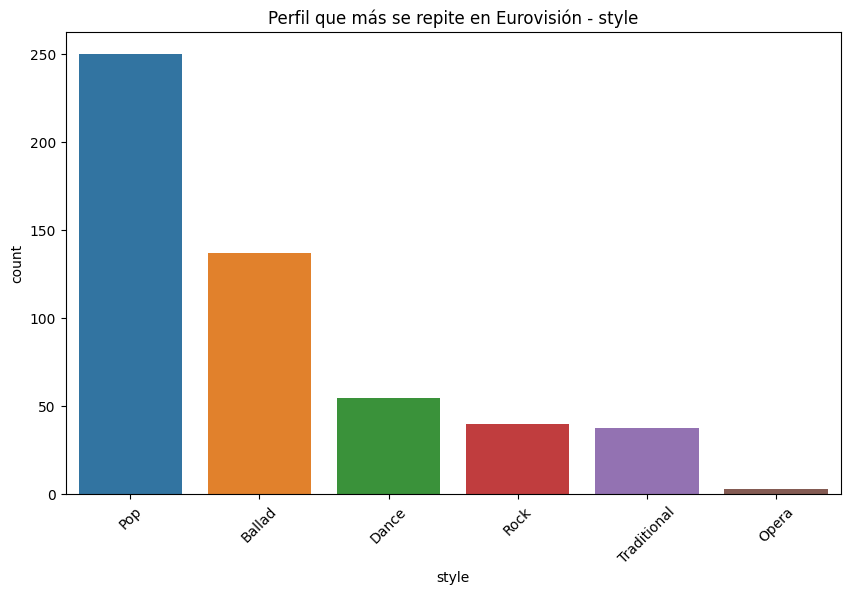

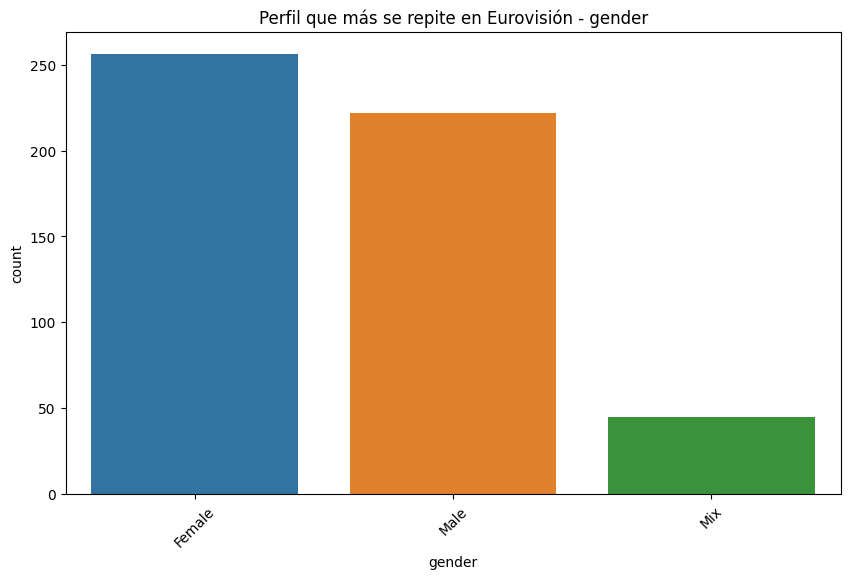

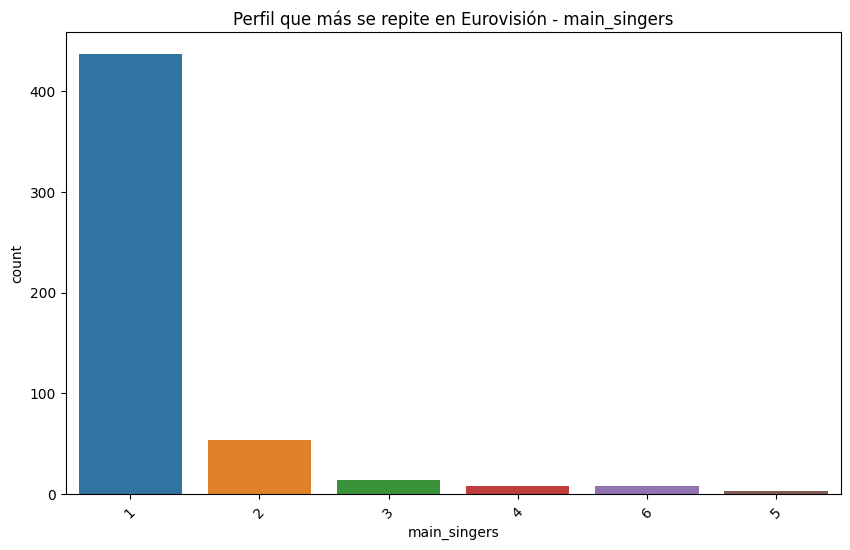

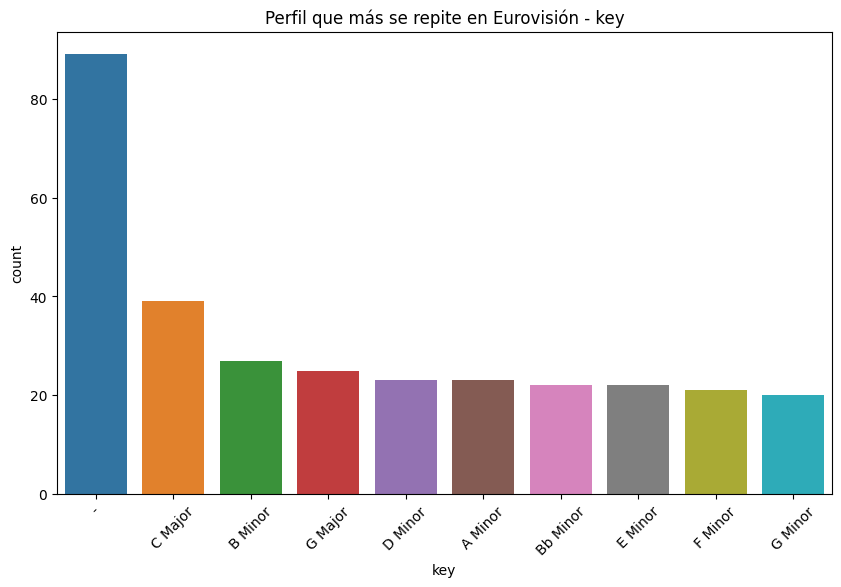

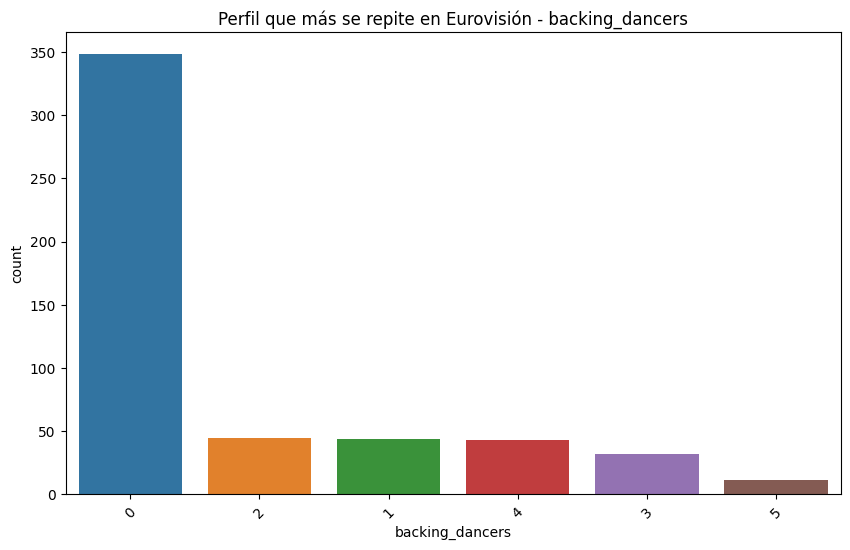

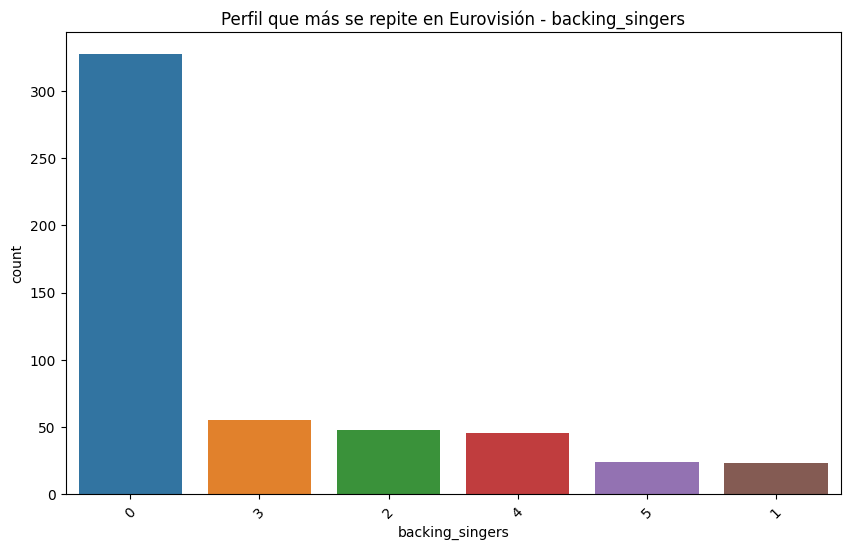

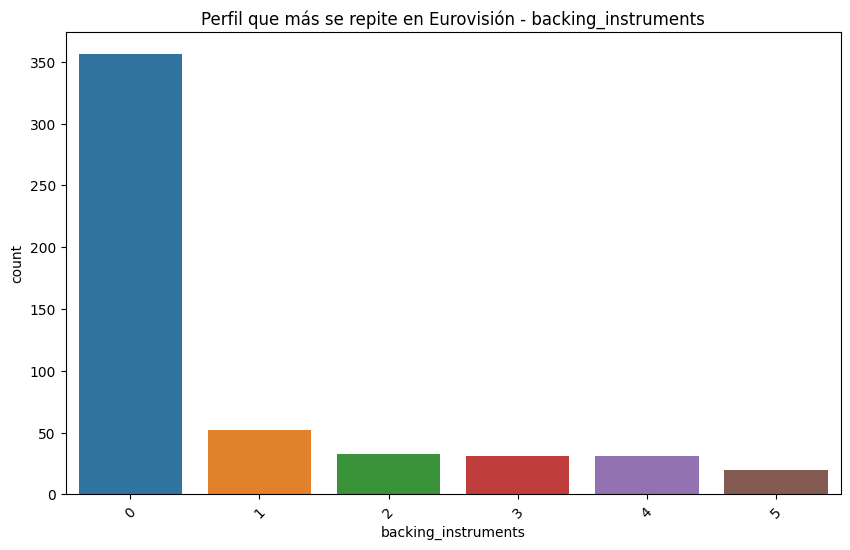

In [212]:
# Crear gráficos de barras para las variables categóricas
categorical_cols = ['language', 'style', 'gender', 'main_singers', 'key', 'backing_dancers', 'backing_singers', 'backing_instruments']
for col in categorical_cols:
    plt.figure(figsize=(10, 6))
    sns.countplot(x=col, data=df1, order=df1[col].value_counts().index[:10])
    plt.xticks(rotation=45)
    plt.title(f"Perfil que más se repite en Eurovisión - {col}")
    plt.show()


Datos de votos 1957 a 2019


In [213]:
df2.tail(n=30)

year         round  total_points  tele_points  jury_points        From  \
46012  2015         final             3          0.0          0.0      Serbia   
46013  2016         final            12          6.0          6.0      Serbia   
46014  2016  semi-final-2            11          7.0          4.0      Serbia   
46015  2017         final             3          0.0          3.0      Serbia   
46016  2018         final             0          0.0          0.0      Serbia   
46017  2018  semi-final-2             9          3.0          6.0      Serbia   
46018  2019         final             7          0.0          7.0      Serbia   
46019  2019  semi-final-1            12          7.0          5.0      Serbia   
46020  2015         final             0          0.0          0.0  Azerbaijan   
46021  2016         final             9          2.0          7.0  Azerbaijan   
46022  2017         final             0          0.0          0.0  Azerbaijan   
46023  2017  semi-final-1             9          2.0          7.0  Azerbaijan   
46024  2018         final             0          0.0          0.0  Azerbaijan   
46025  2019         final             2          0.0          2.0  Azerbaijan   
46026  2015         final             8          0.0          0.0  San Marino   
46027  2016         final             5          5.0          0.0  San Marino   
46028  2017         final             0          0.0          0.0  San Marino   
46029  2018         final             2          0.0          2.0  San Marino   
46030  2018  semi-final-2             4          4.0          0.0  San Marino   
46031  2019         final             0          0.0          0.0  San Marino   
46032  2019  semi-final-1            12          6.0          6.0  San Marino   
46033  2015         final             0          0.0          0.0   Australia   
46034  2016         final             0          0.0          0.0   Australia   
46035  2016  semi-final-2             0          0.0          0.0   Australia   
46036  2017         final             0          0.0          0.0   Australia   
46037  2017  semi-final-1             0          0.0          0.0   Australia   
46038  2018         final             0          0.0          0.0   Australia   
46039  2018  semi-final-2             0          0.0          0.0   Australia   
46040  2019         final             0          0.0          0.0   Australia   
46041  2019  semi-final-1             0          0.0          0.0   Australia   

              To     From_region      To_region  
46012  Australia  Eastern Europe  Out of Europe  
46013  Australia  Eastern Europe  Out of Europe  
46014  Australia  Eastern Europe  Out of Europe  
46015  Australia  Eastern Europe  Out of Europe  
46016  Australia  Eastern Europe  Out of Europe  
46017  Australia  Eastern Europe  Out of Europe  
46018  Australia  Eastern Europe  Out of Europe  
46019  Australia  Eastern Europe  Out of Europe  
46020  Australia   Out of Europe  Out of Europe  
46021  Australia   Out of Europe  Out of Europe  
46022  Australia   Out of Europe  Out of Europe  
46023  Australia   Out of Europe  Out of Europe  
46024  Australia   Out of Europe  Out of Europe  
46025  Australia   Out of Europe  Out of Europe  
46026  Australia  Western Europe  Out of Europe  
46027  Australia  Western Europe  Out of Europe  
46028  Australia  Western Europe  Out of Europe  
46029  Australia  Western Europe  Out of Europe  
46030  Australia  Western Europe  Out of Europe  
46031  Australia  Western Europe  Out of Europe  
46032  Australia  Western Europe  Out of Europe  
46033  Australia   Out of Europe  Out of Europe  
46034  Australia   Out of Europe  Out of Europe  
46035  Australia   Out of Europe  Out of Europe  
46036  Australia   Out of Europe  Out of Europe  
46037  Australia   Out of Europe  Out of Europe  
46038  Australia   Out of Europe  Out of Europe  
46039  Australia   Out of Europe  Out of Europe  
46040  Australia   Out of Europe  Out of Euro

In [214]:
df2.head(n=30)

year  round  total_points  tele_points  jury_points     From           To  \
0   1957  final             6          0.0          0.0  Austria  Netherlands   
1   1958  final             0          0.0          0.0  Austria  Netherlands   
2   1959  final             3          0.0          0.0  Austria  Netherlands   
3   1960  final             0          0.0          0.0  Austria  Netherlands   
4   1961  final             0          0.0          0.0  Austria  Netherlands   
5   1962  final             0          0.0          0.0  Austria  Netherlands   
6   1963  final             0          0.0          0.0  Austria  Netherlands   
7   1964  final             0          0.0          0.0  Austria  Netherlands   
8   1965  final             0          0.0          0.0  Austria  Netherlands   
9   1966  final             0          0.0          0.0  Austria  Netherlands   
10  1967  final             0          0.0          0.0  Austria  Netherlands   
11  1968  final             0          0.0          0.0  Austria  Netherlands   
12  1971  final             6          0.0          0.0  Austria  Netherlands   
13  1972  final             6          0.0          0.0  Austria  Netherlands   
14  1976  final             4          0.0          0.0  Austria  Netherlands   
15  1977  final             0          0.0          0.0  Austria  Netherlands   
16  1978  final             0          0.0          0.0  Austria  Netherlands   
17  1979  final             4          0.0          0.0  Austria  Netherlands   
18  1980  final            12          0.0          0.0  Austria  Netherlands   
19  1981  final             3          0.0          0.0  Austria  Netherlands   
20  1982  final             0          0.0          0.0  Austria  Netherlands   
21  1983  final             4          0.0          0.0  Austria  Netherlands   
22  1984  final             0          0.0          0.0  Austria  Netherlands   
23  1986  final             0          0.0          0.0  Austria  Netherlands   
24  1987  final             2          0.0          0.0  Austria  Netherlands   
25  1988  final             0          0.0          0.0  Austria  Netherlands   
26  1989  final             4          0.0          0.0  Austria  Netherlands   
27  1990  final             0          0.0          0.0  Austria  Netherlands   
28  1992  final             5          0.0          0.0  Austria  Netherlands   
29  1993  final             3          0.0          0.0  Austria  Netherlands   

       From_region       To_region  
0   Eastern Europe  Western Europe  
1   Eastern Europe  Western Europe  
2   Eastern Europe  Western Europe  
3   Eastern Europe  Western Europe  
4   Eastern Europe  Western Europe  
5   Eastern Europe  Western Europe  
6   Eastern Europe  Western Europe  
7   Eastern Europe  Western Europe  
8   Eastern Europe  Western Europe  
9   Eastern Europe  Western Europe  
10  Eastern Europe  Western Europe  
11  Eastern Europe  Western Europe  
12  Eastern Europe  Western Europe  
13  Eastern Europe  Western Europe  
14  Eastern Europe  Western Europe  
15  Eastern Europe  Western Europe  
16  Eastern Europe  Western Europe  
17  Eastern Europe  Western Europe  
18  Eastern Europe  Western Europe  
19  Eastern Europe  Western Europe  
20  Eastern Europe  Western Europe  
21  Eastern Europe  Western Europe  
22  Eastern Europe  Western Europe  
23  Eastern Europe  Western Europe  
24  Eastern Europe  Western Europe  
25  Eastern Europe  Western Europe  
26  Eastern Europe  Western Europe  
27  Eastern Europe  Western Europe  
28  Eastern Europe  Western Europe  
29  Eastern Europe  Western Europe

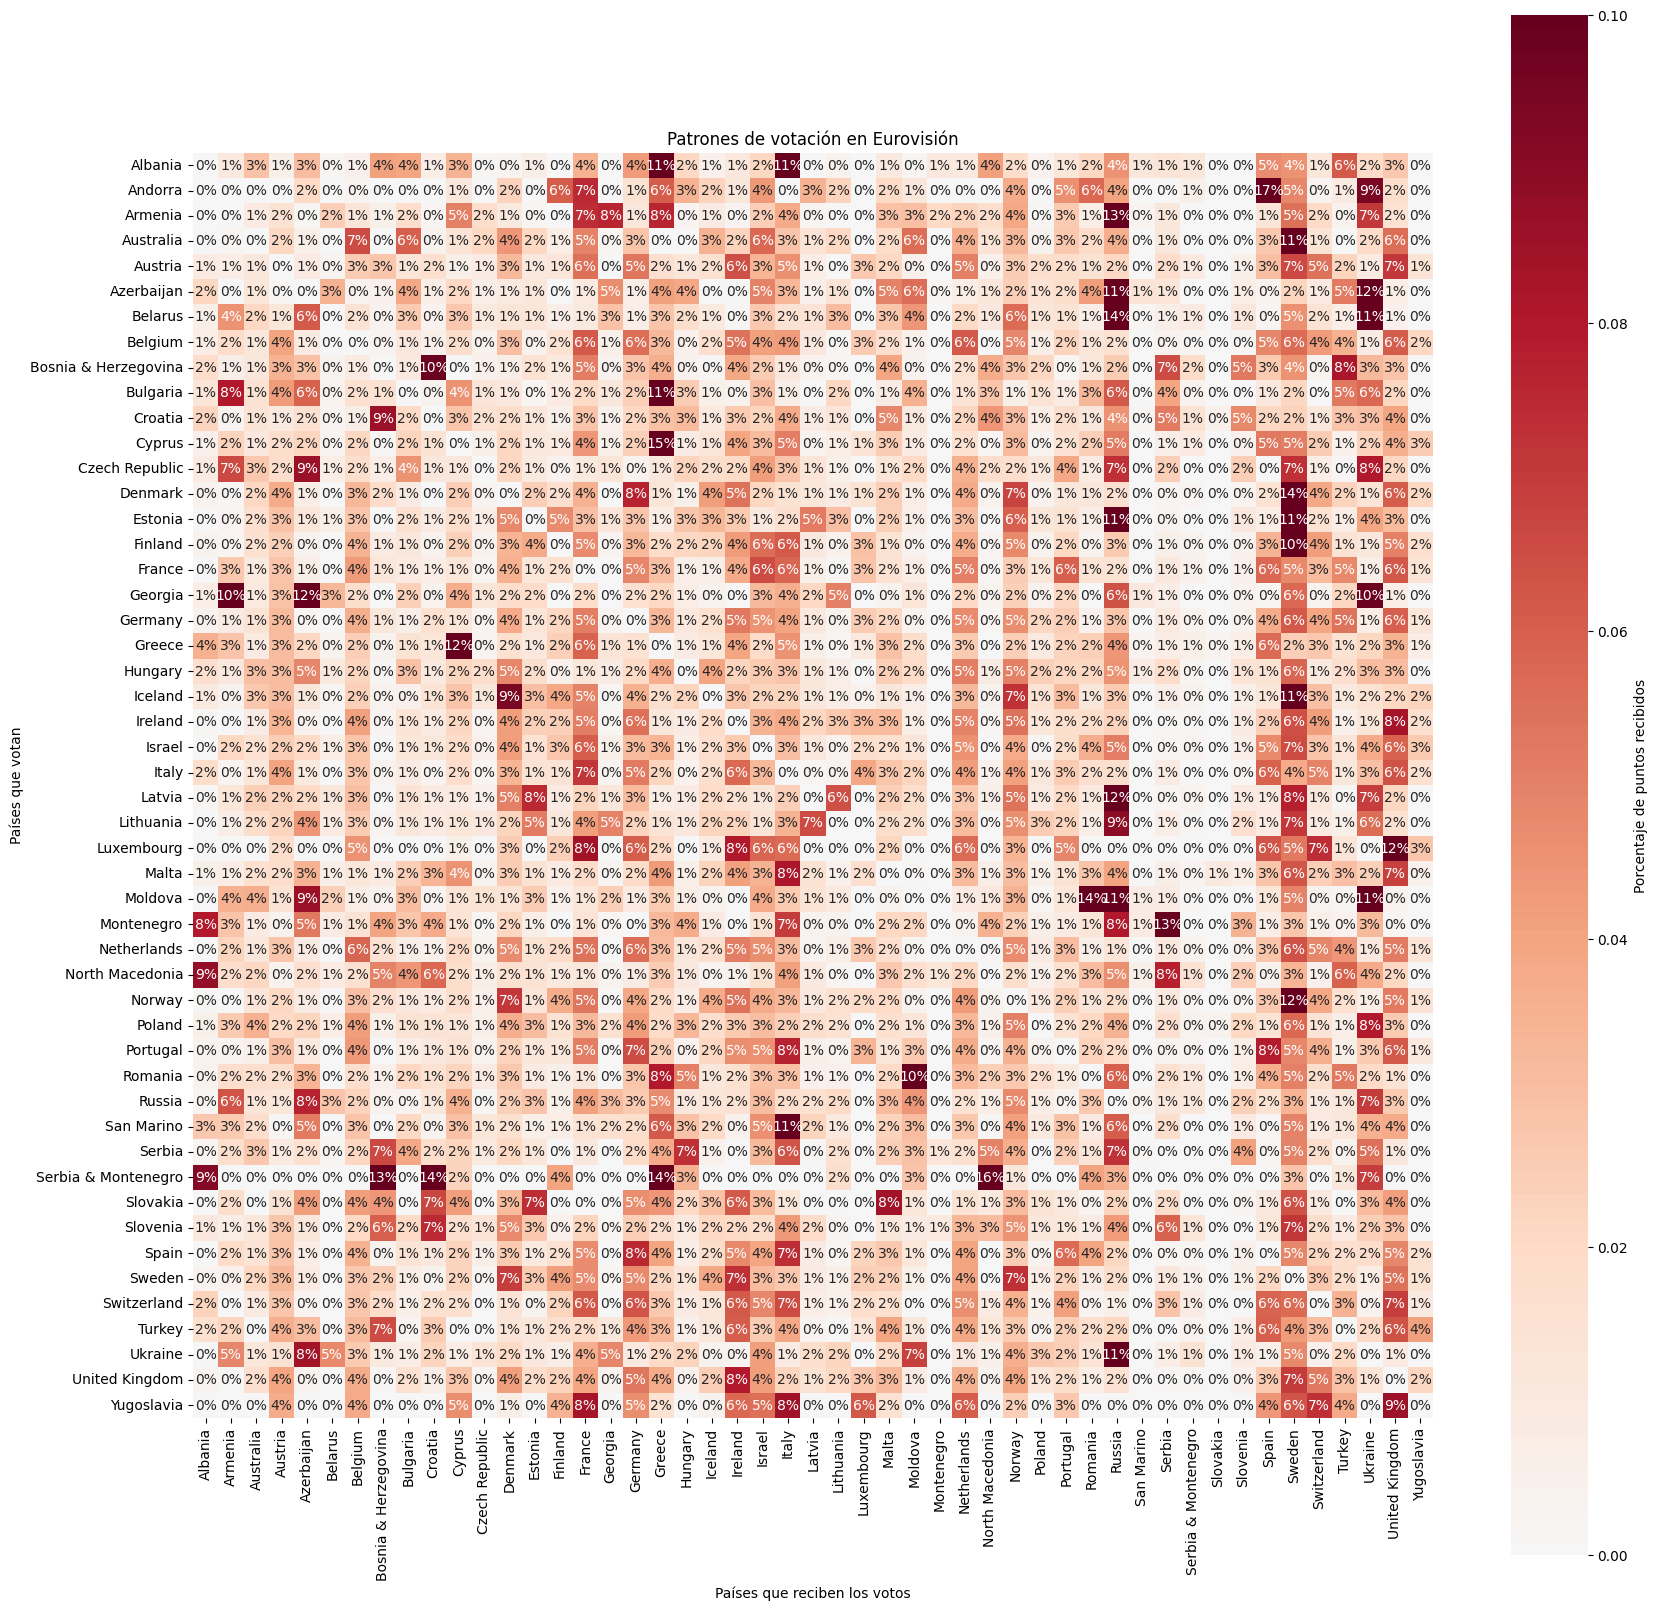

In [215]:
# Filtrar solo la ronda final
final_df2 = df2.query("round == 'final'")

# Crear la matriz de votos normalizada
votos_matriz = pd.pivot_table(final_df2, values='total_points', index=['From'], columns=['To'], aggfunc=np.sum, fill_value=0)
votos_matriz_norm = votos_matriz.div(votos_matriz.sum(axis=1), axis=0)

# Crear un mapa de calor con una escala de colores divergentes
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.0%', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            vmin=0, vmax=0.1, center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()



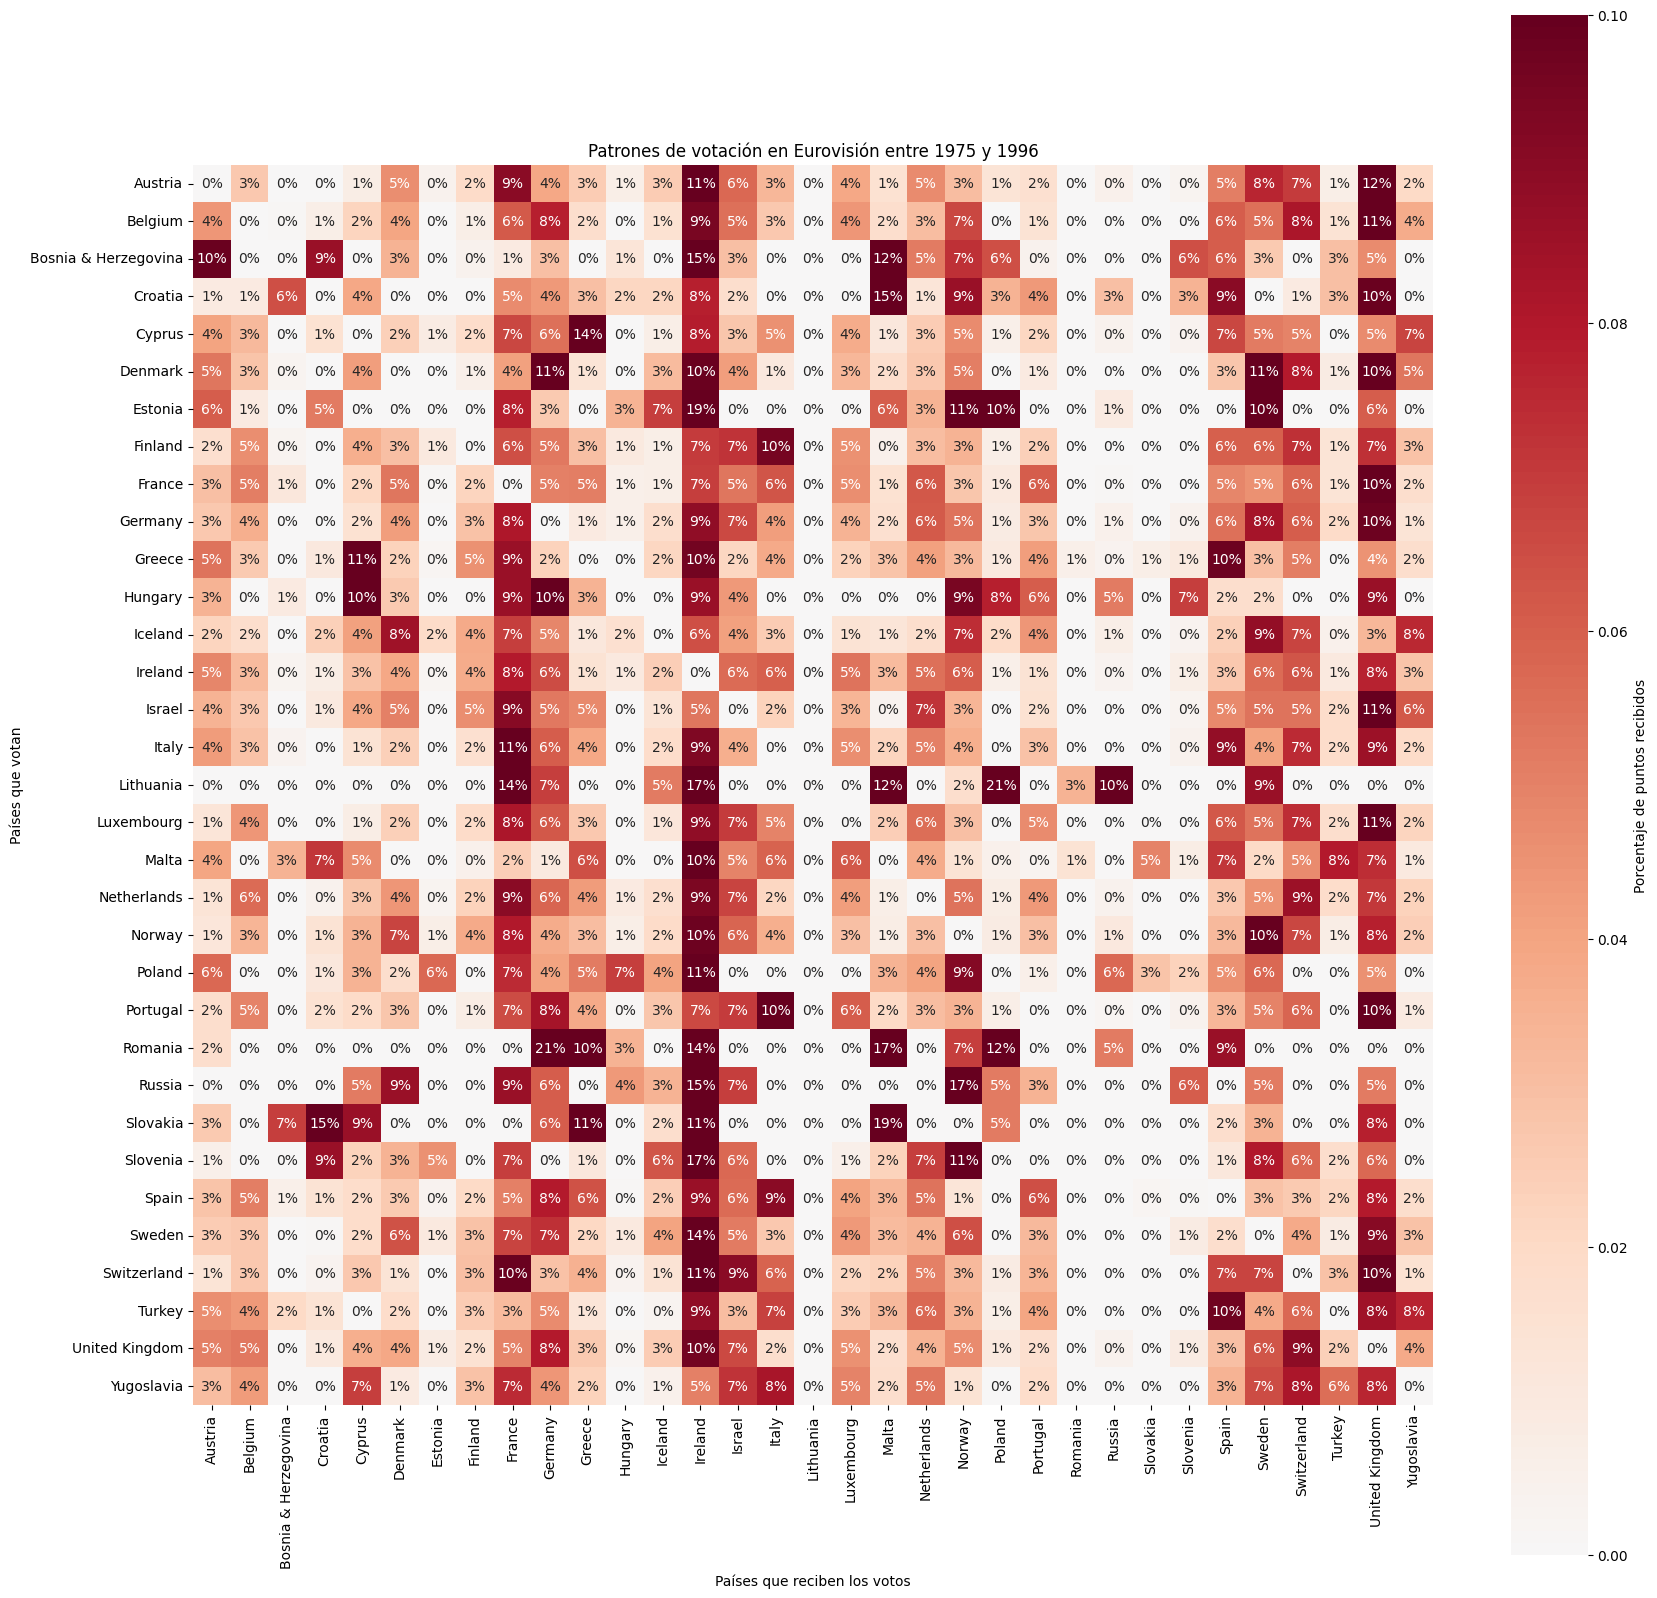

In [216]:
# Filtrar solo la ronda final
final7596_df2 = df2.query("round == 'final' and 1975 <= year <= 1996")

# Crear la matriz de votos normalizada
votos_matriz = pd.pivot_table(final7596_df2, values='total_points', index=['From'], columns=['To'], aggfunc=np.sum, fill_value=0)
votos_matriz_norm = votos_matriz.div(votos_matriz.sum(axis=1), axis=0)

# Crear un mapa de calor con una escala de colores divergentes
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.0%', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            vmin=0, vmax=0.1, center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión entre 1975 y 1996')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()


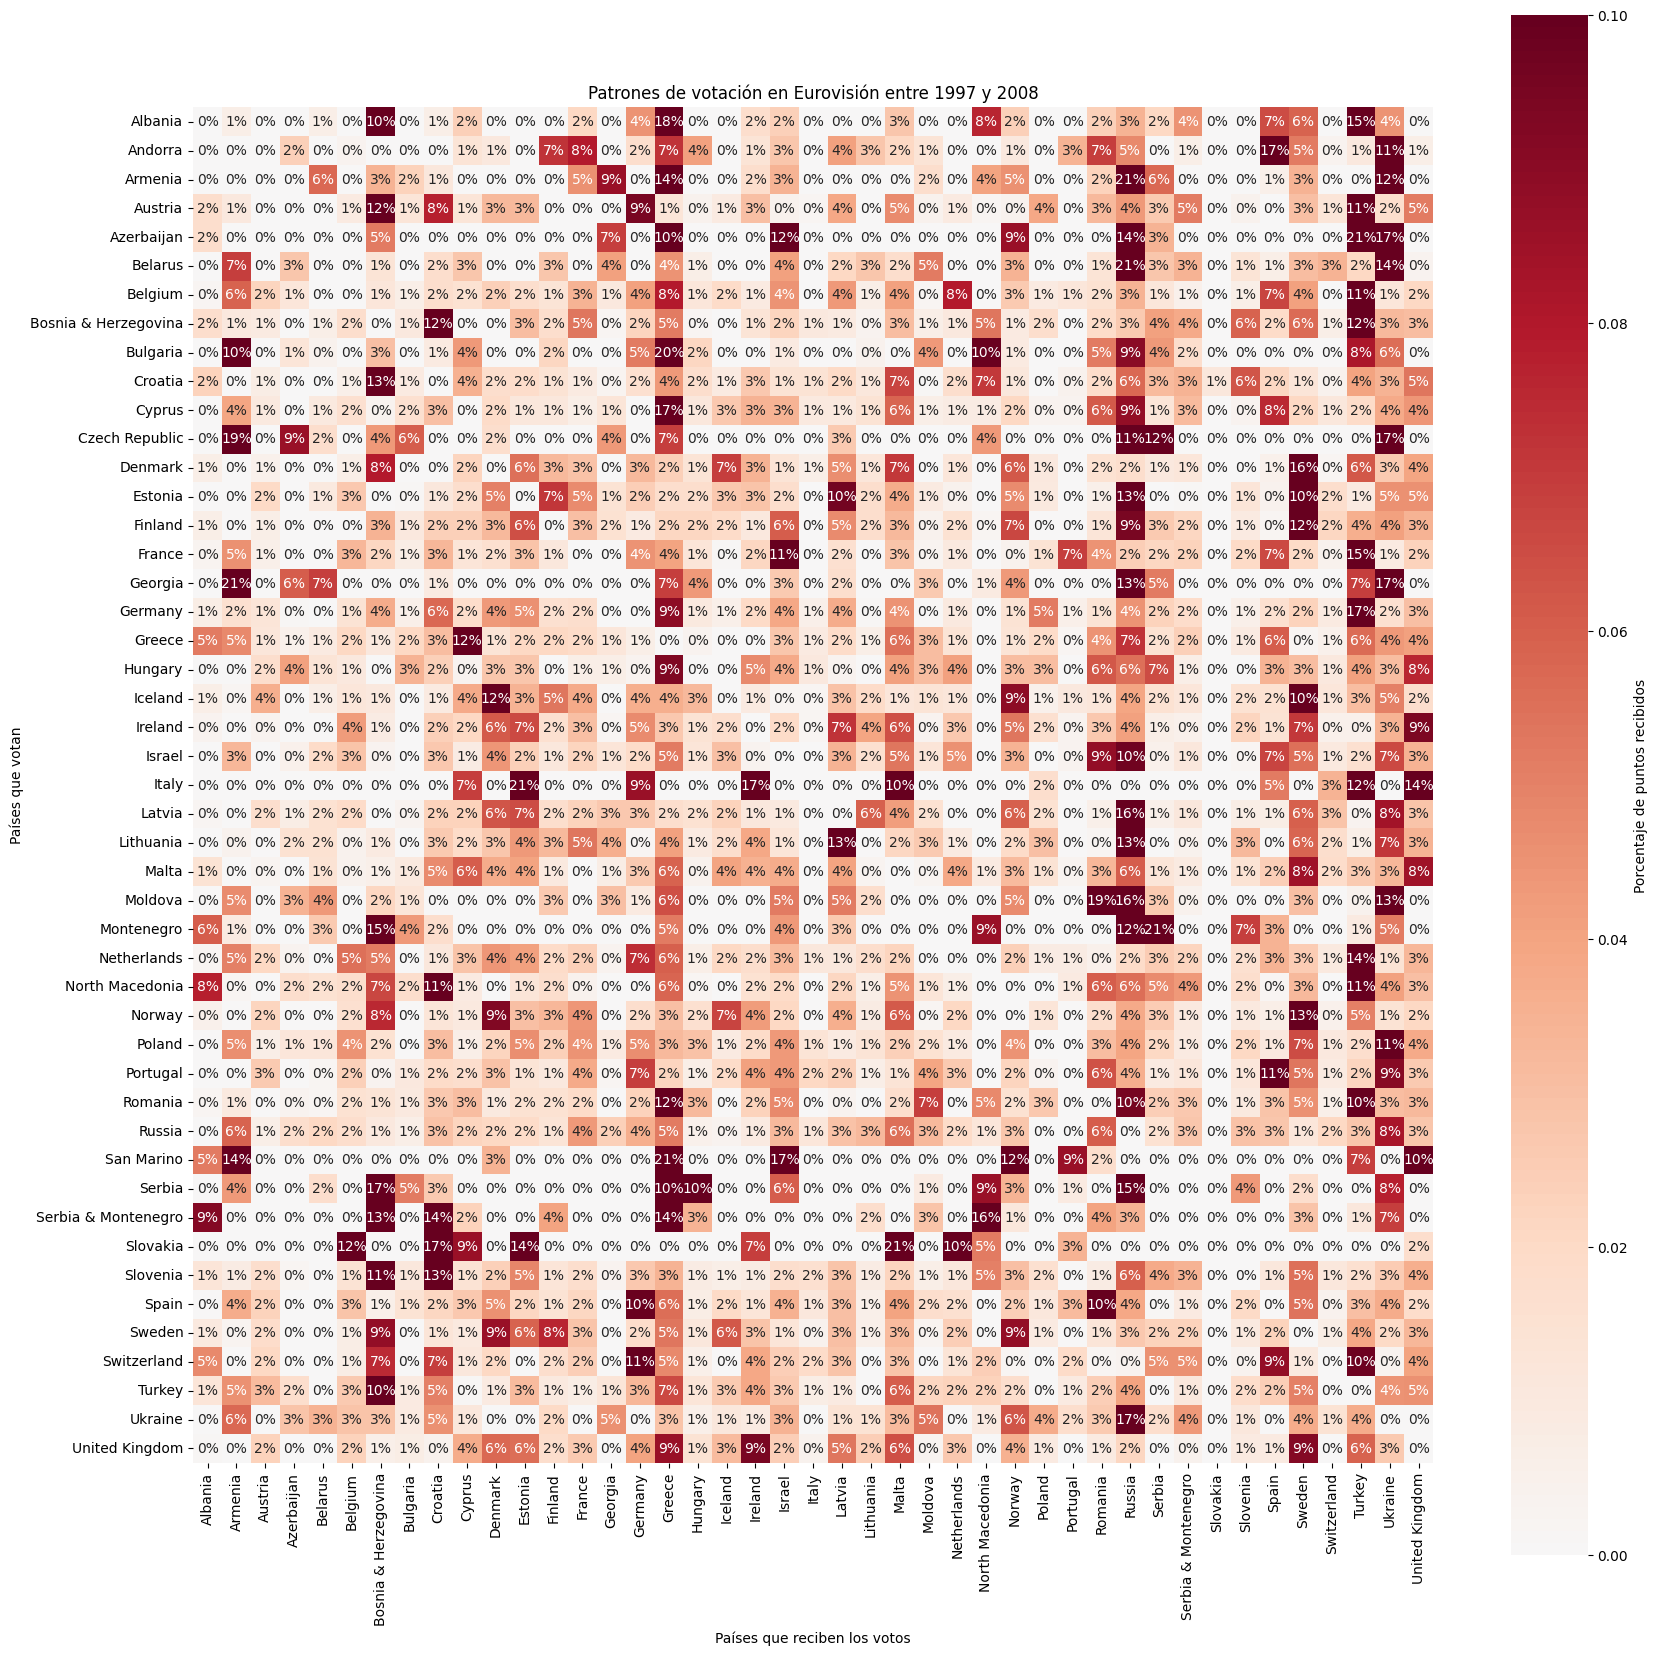

In [217]:
# Filtrar solo la ronda final
final9708_df2 = df2.query("round == 'final' and 1997 <= year <= 2008")

# Crear la matriz de votos normalizada
votos_matriz = pd.pivot_table(final9708_df2, values='total_points', index=['From'], columns=['To'], aggfunc=np.sum, fill_value=0)
votos_matriz_norm = votos_matriz.div(votos_matriz.sum(axis=1), axis=0)

# Crear un mapa de calor con una escala de colores divergentes
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.0%', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            vmin=0, vmax=0.1, center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión entre 1997 y 2008')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()


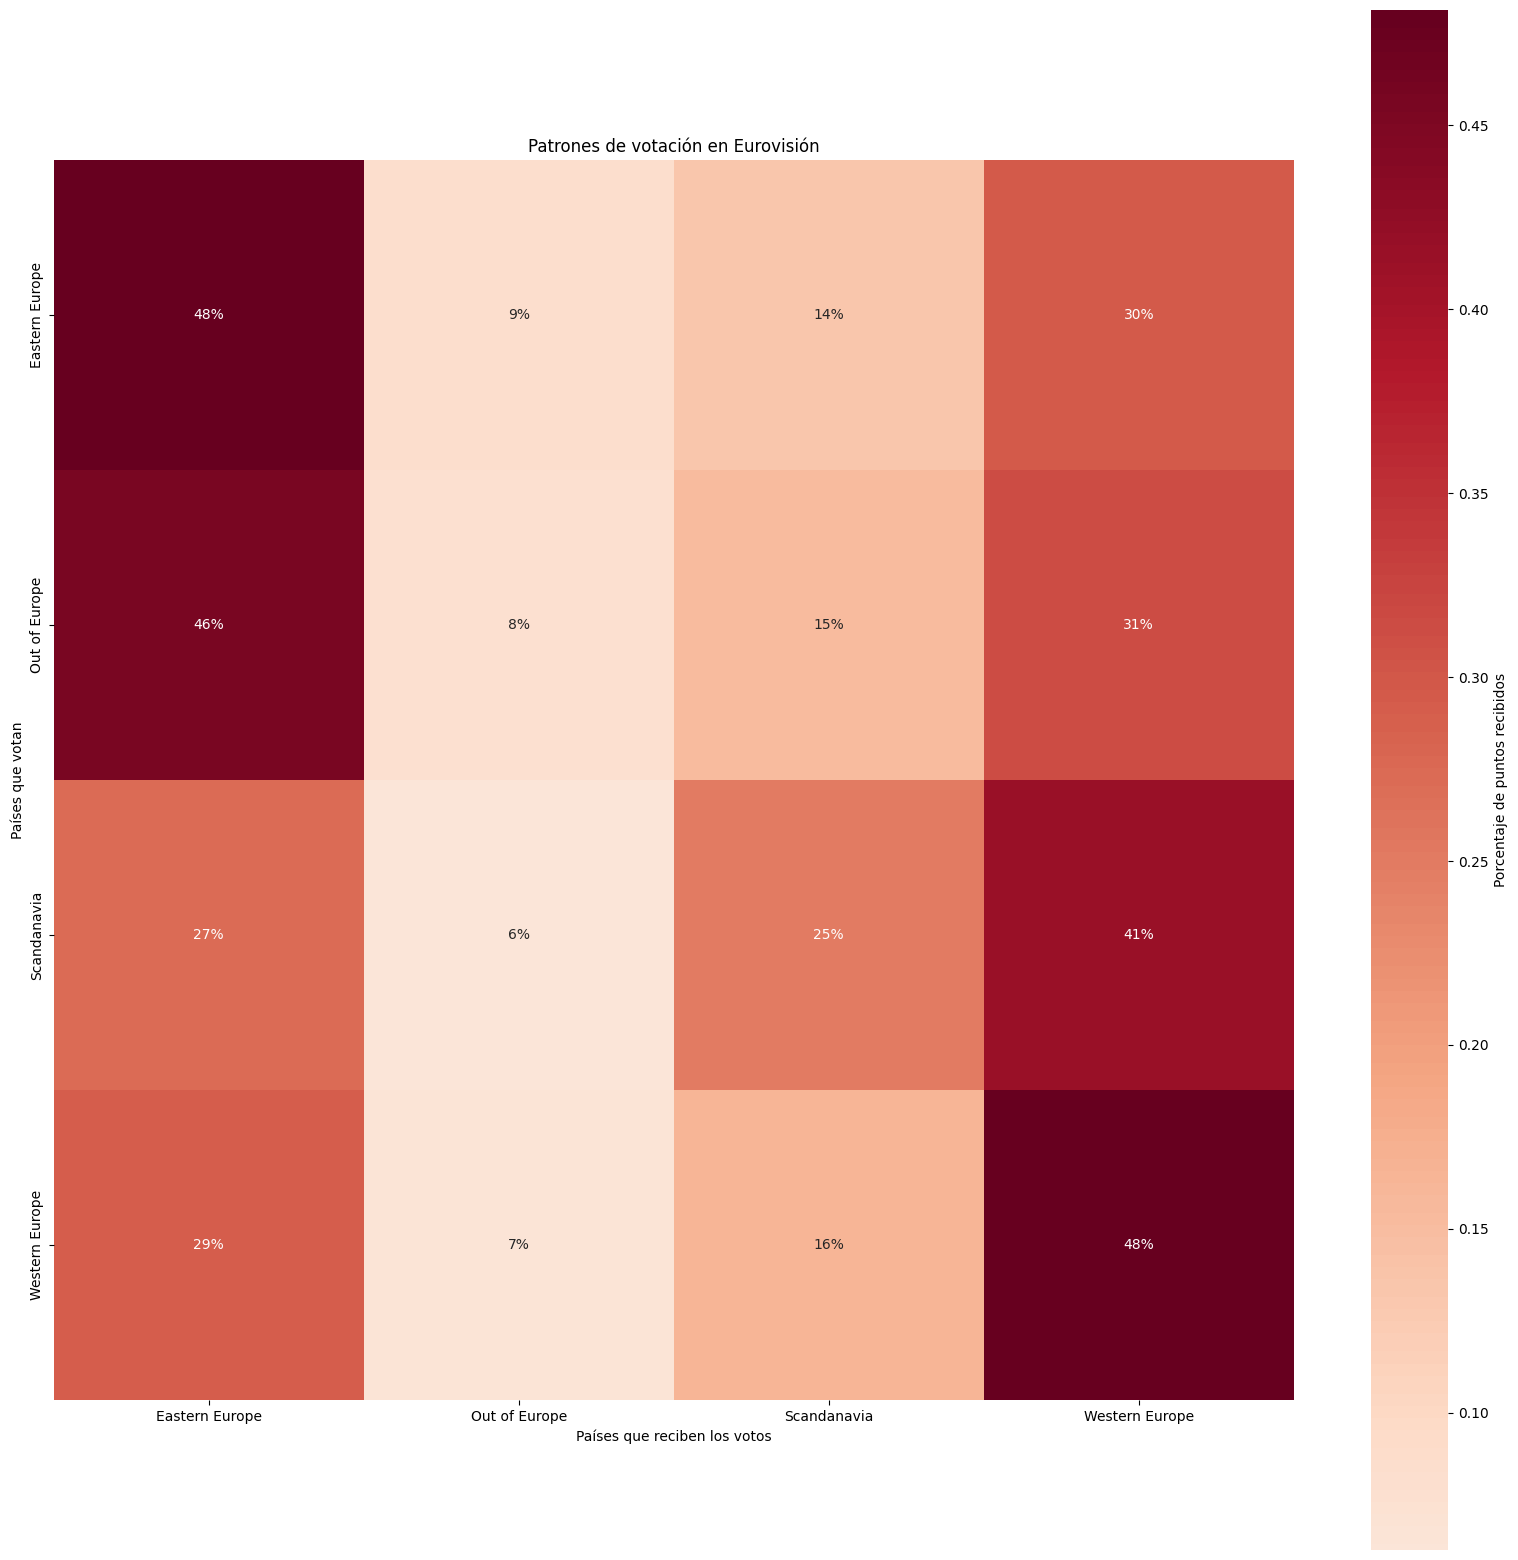

In [218]:
# Crear la matriz de votos normalizada
votos_matriz = pd.pivot_table(final_df2, values='total_points', index=['From_region'], columns=['To_region'], aggfunc=np.sum, fill_value=0)
votos_matriz_norm = votos_matriz.div(votos_matriz.sum(axis=1), axis=0)

# Crear un mapa de calor con una escala de colores
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.0%', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()

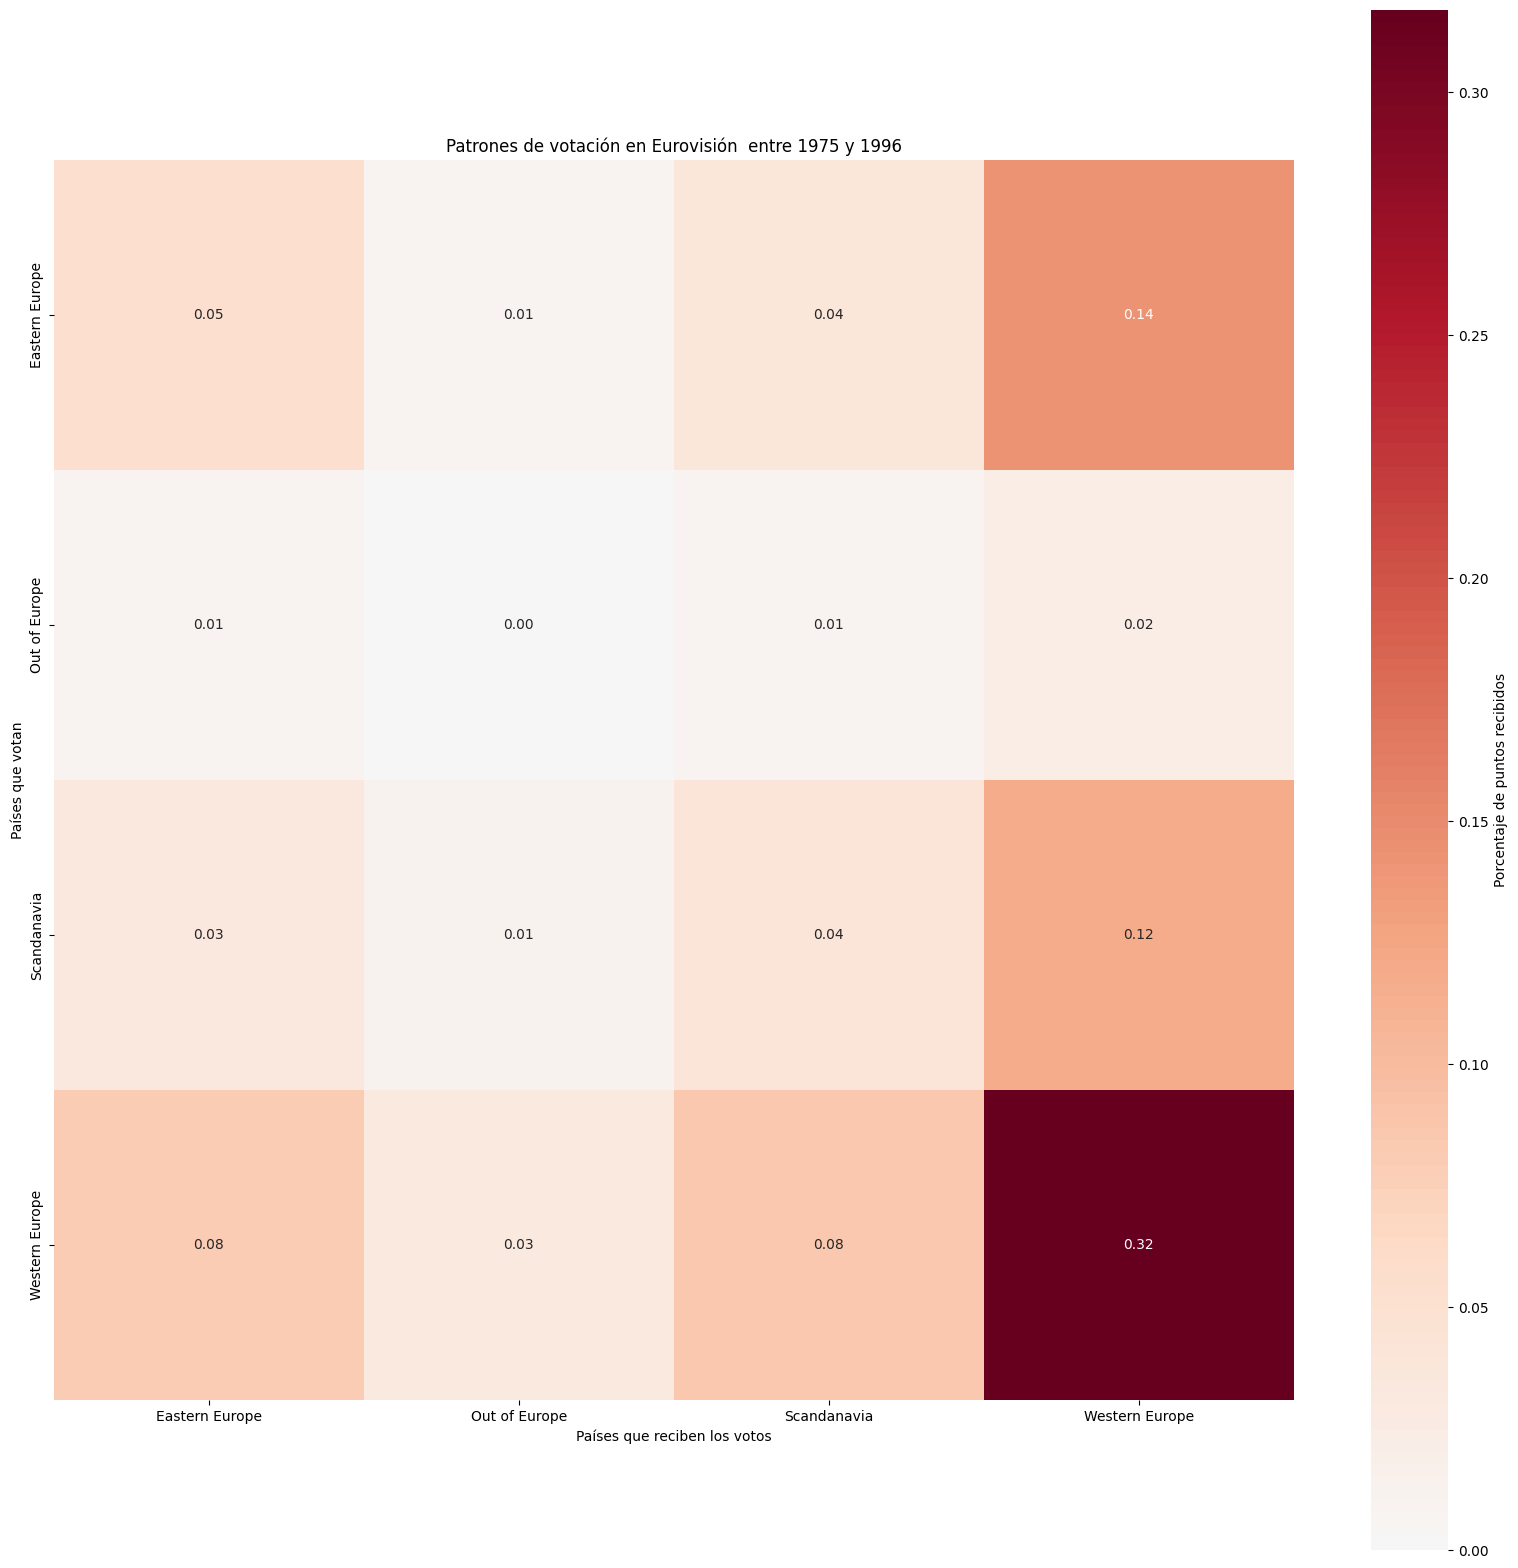

In [219]:
# Crear la matriz de votos
votos_matriz = pd.pivot_table(final7596_df2, values='total_points', index=['From_region'], columns=['To_region'], aggfunc=np.sum, fill_value=0)

# Dividir cada valor por la suma total de valores en la matriz
votos_matriz_norm = votos_matriz / votos_matriz.values.sum()

# Crear un mapa de calor con una escala de colores divergentes
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.2f', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión  entre 1975 y 1996')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()


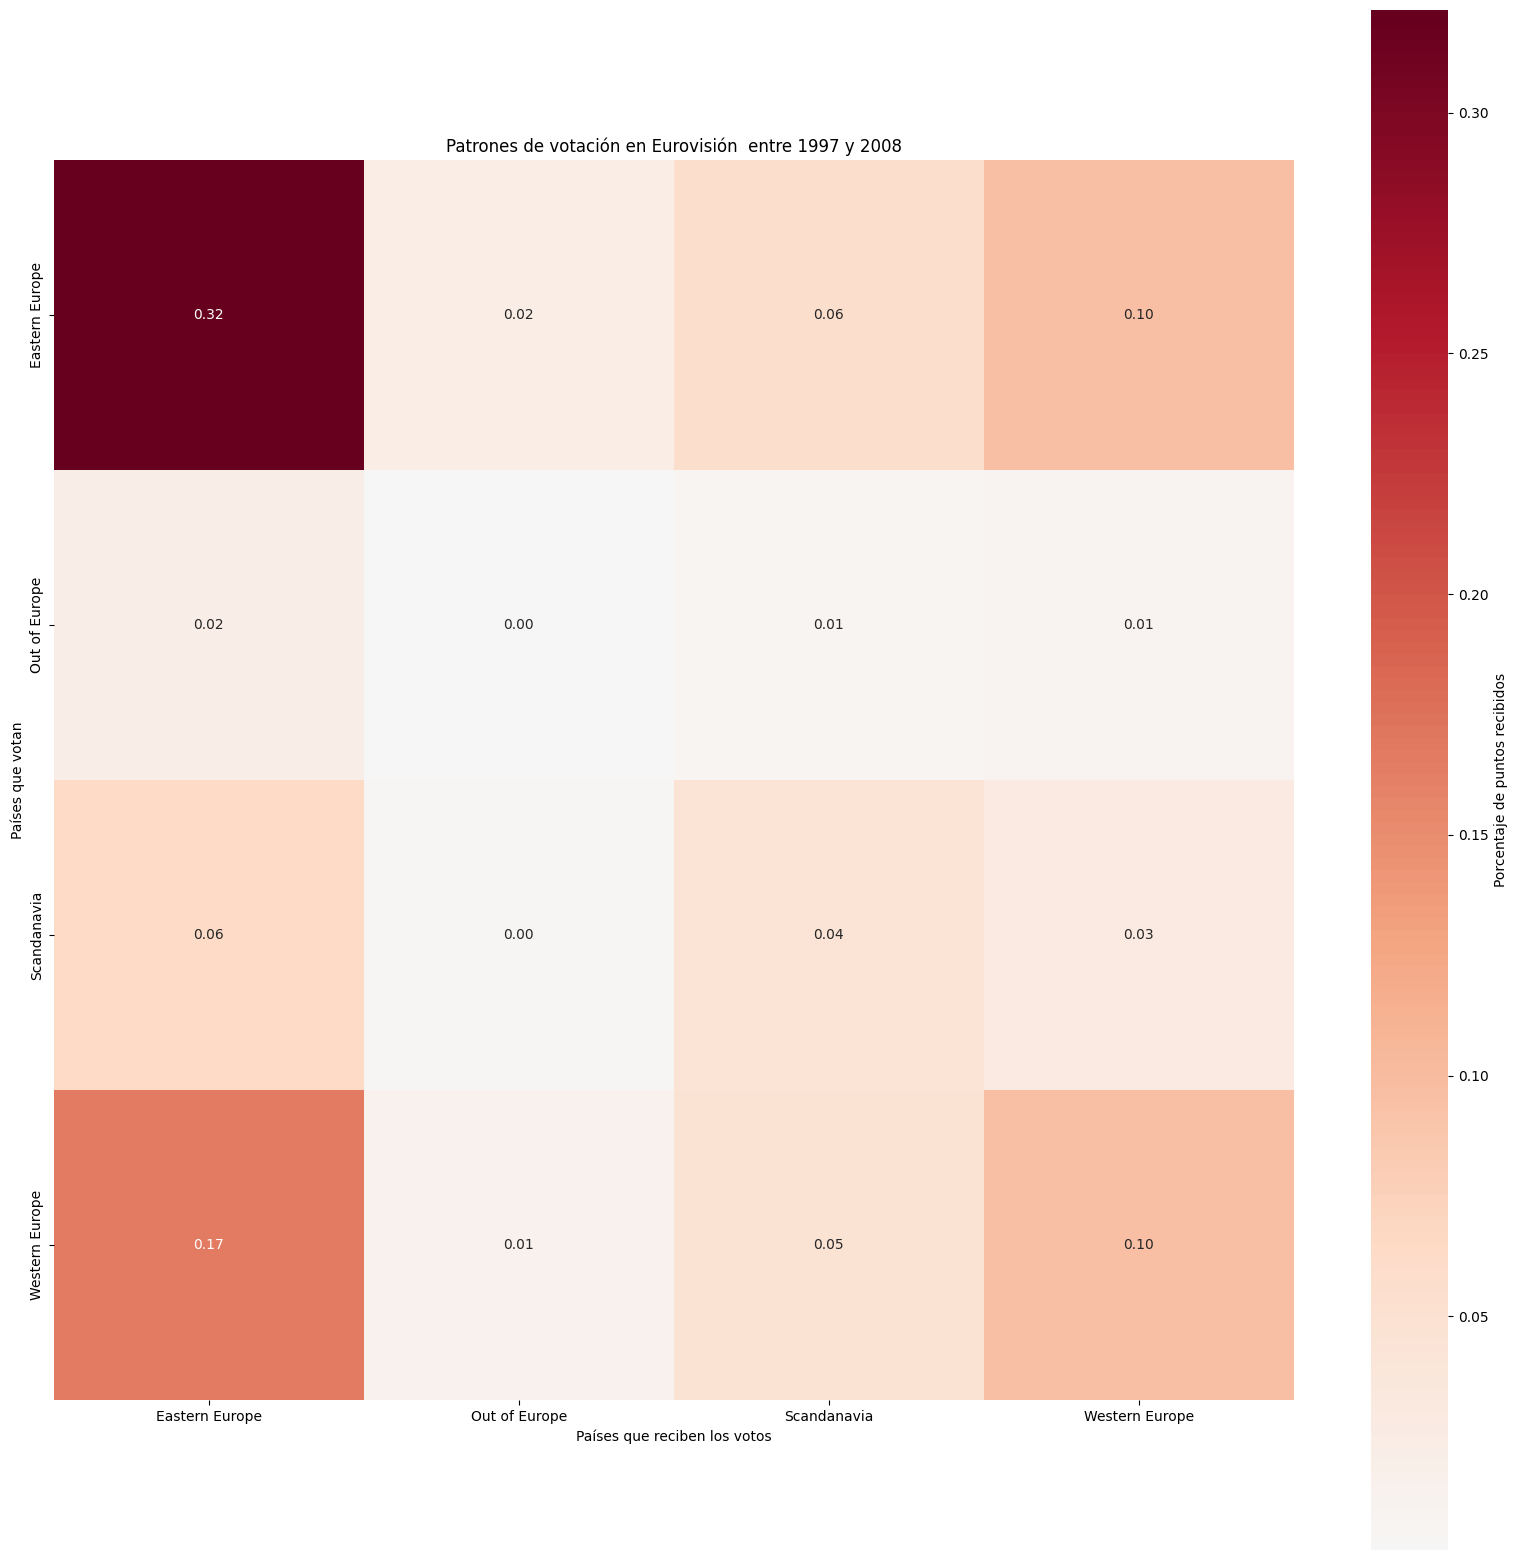

In [220]:
# Crear la matriz de votos
votos_matriz = pd.pivot_table(final9708_df2, values='total_points', index=['From_region'], columns=['To_region'], aggfunc=np.sum, fill_value=0)

# Dividir cada valor por la suma total de valores en la matriz
votos_matriz_norm = votos_matriz / votos_matriz.values.sum()

# Crear un mapa de calor con una escala de colores divergentes
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.2f', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión  entre 1997 y 2008')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()

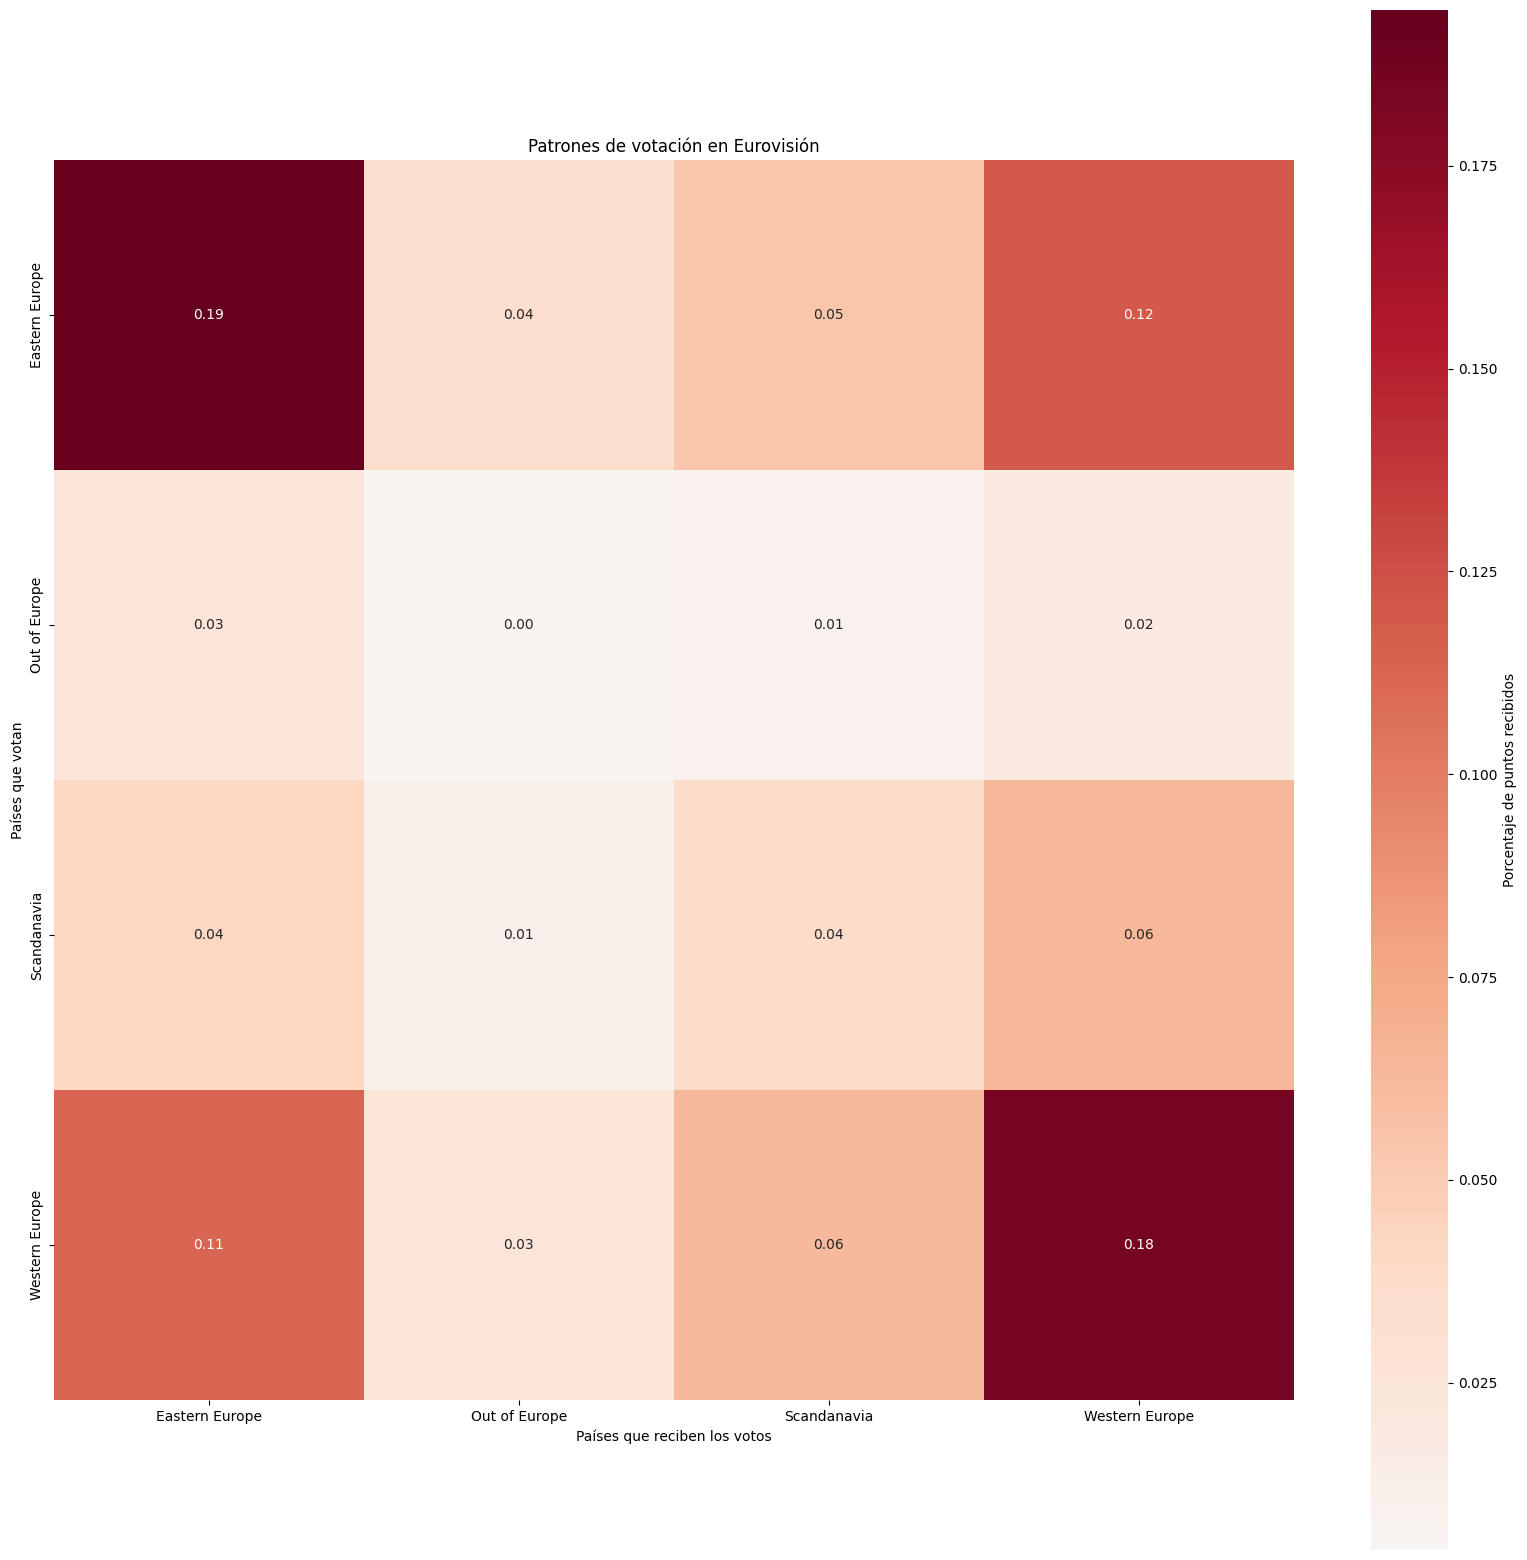

In [221]:
# Crear la matriz de votos
votos_matriz = pd.pivot_table(final_df2, values='total_points', index=['From_region'], columns=['To_region'], aggfunc=np.sum, fill_value=0)

# Dividir cada valor por la suma total de valores en la matriz
votos_matriz_norm = votos_matriz / votos_matriz.values.sum()

# Crear un mapa de calor con una escala de colores divergentes
plt.figure(figsize=(20, 20))
sns.heatmap(votos_matriz_norm, cmap='RdBu_r', annot=True, fmt='.2f', cbar_kws={'label': 'Porcentaje de puntos recibidos'},
            center=0, square=True,
            cbar=True, cbar_ax=None,
            yticklabels=True, xticklabels=True)
plt.title('Patrones de votación en Eurovisión')
plt.xlabel('Países que reciben los votos')
plt.ylabel('Países que votan')
plt.show()


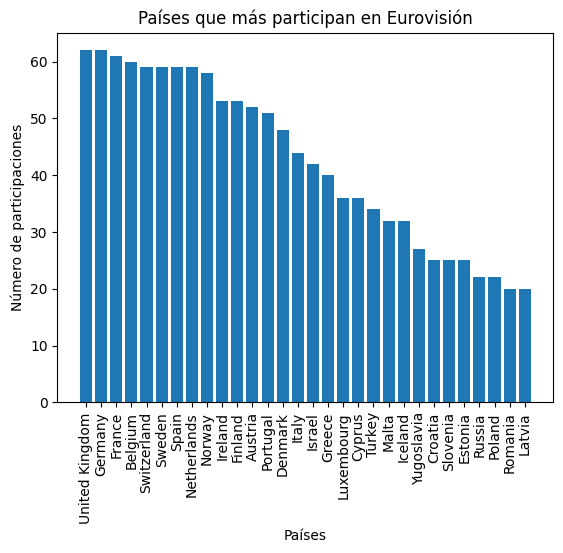

In [222]:
participations = df2.groupby('From')['year'].nunique().sort_values(ascending=False)[:30]
plt.bar(participations.index, participations.values)
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.ylabel('Número de participaciones')
plt.title('Países que más participan en Eurovisión')
plt.show()


In [223]:
df2.head()

year  round  total_points  tele_points  jury_points     From           To  \
0  1957  final             6          0.0          0.0  Austria  Netherlands   
1  1958  final             0          0.0          0.0  Austria  Netherlands   
2  1959  final             3          0.0          0.0  Austria  Netherlands   
3  1960  final             0          0.0          0.0  Austria  Netherlands   
4  1961  final             0          0.0          0.0  Austria  Netherlands   

      From_region       To_region  
0  Eastern Europe  Western Europe  
1  Eastern Europe  Western Europe  
2  Eastern Europe  Western Europe  
3  Eastern Europe  Western Europe  
4  Eastern Europe  Western Europe

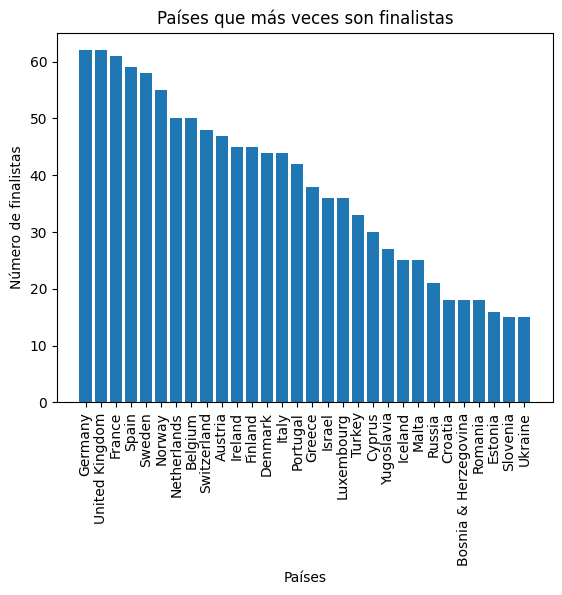

In [224]:
# 
participations_final = df2[df2['round'] == 'final'].groupby('To')['year'].nunique().sort_values(ascending=False)[:30]
plt.bar(participations_final.index, participations_final.values)
plt.xticks(rotation=90)
plt.xlabel('Países')
plt.ylabel('Número de finalistas')
plt.title('Países que más veces son finalistas')
plt.show()

In [225]:
print(participations)



From
United Kingdom    62
Germany           62
France            61
Belgium           60
Switzerland       59
Sweden            59
Spain             59
Netherlands       59
Norway            58
Ireland           53
Finland           53
Austria           52
Portugal          51
Denmark           48
Italy             44
Israel            42
Greece            40
Luxembourg        36
Cyprus            36
Turkey            34
Malta             32
Iceland           32
Yugoslavia        27
Croatia           25
Slovenia          25
Estonia           25
Russia            22
Poland            22
Romania           20
Latvia            20
Name: year, dtype: int64


In [226]:
print(participations_final)

To
Germany                 62
United Kingdom          62
France                  61
Spain                   59
Sweden                  58
Norway                  55
Netherlands             50
Belgium                 50
Switzerland             48
Austria                 47
Ireland                 45
Finland                 45
Denmark                 44
Italy                   44
Portugal                42
Greece                  38
Israel                  36
Luxembourg              36
Turkey                  33
Cyprus                  30
Yugoslavia              27
Iceland                 25
Malta                   25
Russia                  21
Croatia                 18
Bosnia & Herzegovina    18
Romania                 18
Estonia                 16
Slovenia                15
Ukraine                 15
Name: year, dtype: int64


In [227]:
df2.head(n=50)

year         round  total_points  tele_points  jury_points     From  \
0   1957         final             6          0.0          0.0  Austria   
1   1958         final             0          0.0          0.0  Austria   
2   1959         final             3          0.0          0.0  Austria   
3   1960         final             0          0.0          0.0  Austria   
4   1961         final             0          0.0          0.0  Austria   
5   1962         final             0          0.0          0.0  Austria   
6   1963         final             0          0.0          0.0  Austria   
7   1964         final             0          0.0          0.0  Austria   
8   1965         final             0          0.0          0.0  Austria   
9   1966         final             0          0.0          0.0  Austria   
10  1967         final             0          0.0          0.0  Austria   
11  1968         final             0          0.0          0.0  Austria   
12  1971         final             6          0.0          0.0  Austria   
13  1972         final             6          0.0          0.0  Austria   
14  1976         final             4          0.0          0.0  Austria   
15  1977         final             0          0.0          0.0  Austria   
16  1978         final             0          0.0          0.0  Austria   
17  1979         final             4          0.0          0.0  Austria   
18  1980         final            12          0.0          0.0  Austria   
19  1981         final             3          0.0          0.0  Austria   
20  1982         final             0          0.0          0.0  Austria   
21  1983         final             4          0.0          0.0  Austria   
22  1984         final             0          0.0          0.0  Austria   
23  1986         final             0          0.0          0.0  Austria   
24  1987         final             2          0.0          0.0  Austria   
25  1988         final             0          0.0          0.0  Austria   
26  1989         final             4          0.0          0.0  Austria   
27  1990         final             0          0.0          0.0  Austria   
28  1992         final             5          0.0          0.0  Austria   
29  1993         final             3          0.0          0.0  Austria   
30  1994         final             4          0.0          0.0  Austria   
31  1996         final            12          0.0          0.0  Austria   
32  1997         final             0          0.0          0.0  Austria   
33  1999         final             4          0.0          0.0  Austria   
34  2000         final             0          0.0          0.0  Austria   
35  2003         final             0          0.0          0.0  Austria   
36  2004         final             0          0.0          0.0  Austria   
37  2004    semi-final             3          0.0          0.0  Austria   
38  2005    semi-final             0          0.0          0.0  Austria   
39  2007    semi-final             0          0.0          0.0  Austria   
40  2011  semi-final-2             0          0.0          0.0  Austria   
41  2013         final             8          0.0          0.0  Austria   
42  2013  semi-final-1             8          0.0          0.0  Austria   
43  2014         final            10          0.0          0.0  Austria   
44  2015  semi-final-1             0          0.0          0.0  Austria   
45  2016         final             6          6.0          0.0  Austria   
46  2016  semi-final-1            16         10.0          6.0  Austria   
47  2017         final            12          0.0         12.0  Austria   
48  2017  semi-final-2            12          4.0          8.0  Austria   
49  2018         final             1          0.0          1.0  Austria   

             To     From_region       To_region  
0   Netherlands  Eastern Europe  Western Europe  
1   Netherlands  Eastern Europe  Western Europe  
2   Netherlands  Eastern Eur

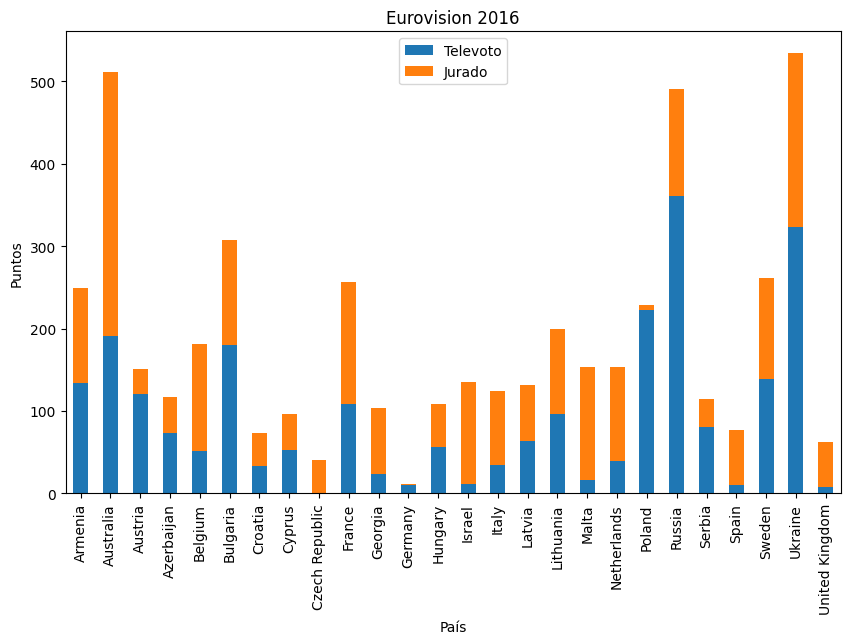

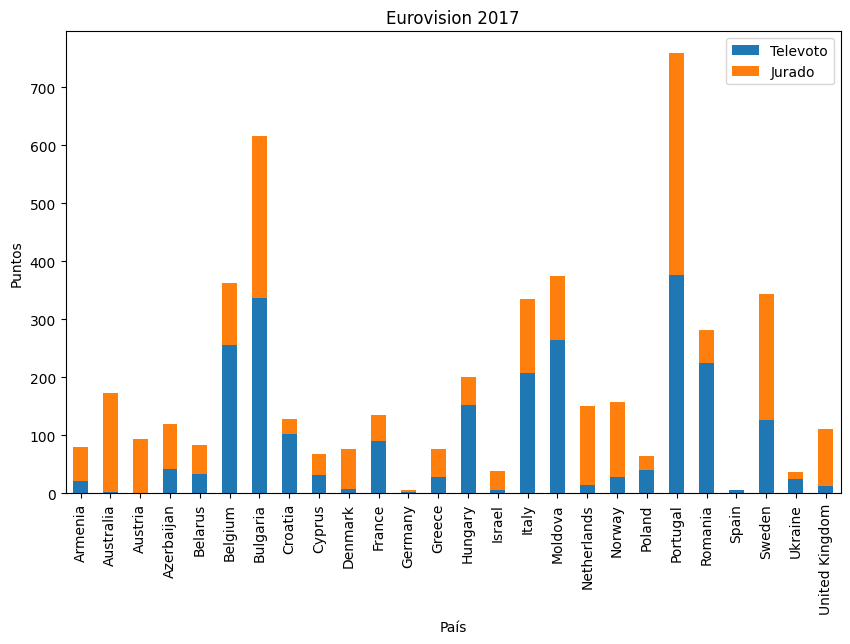

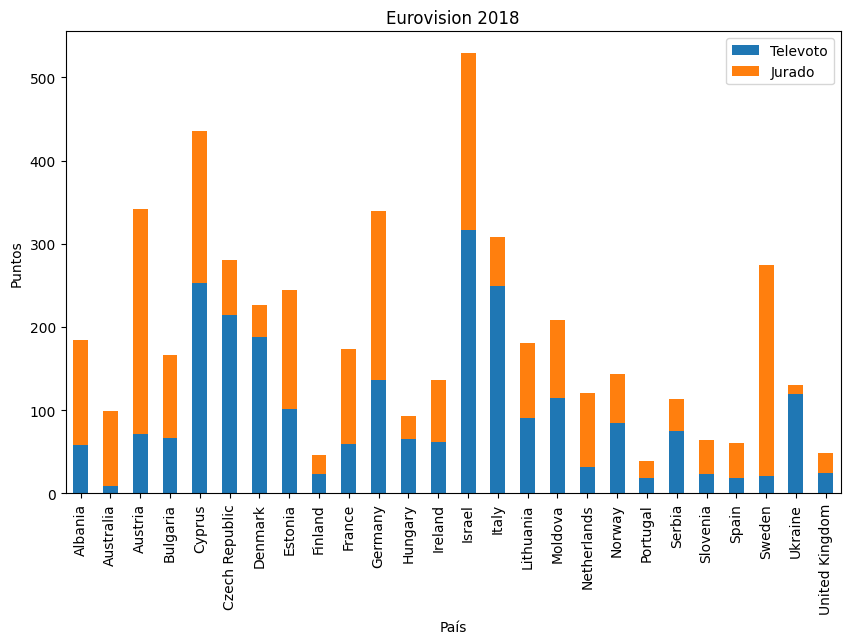

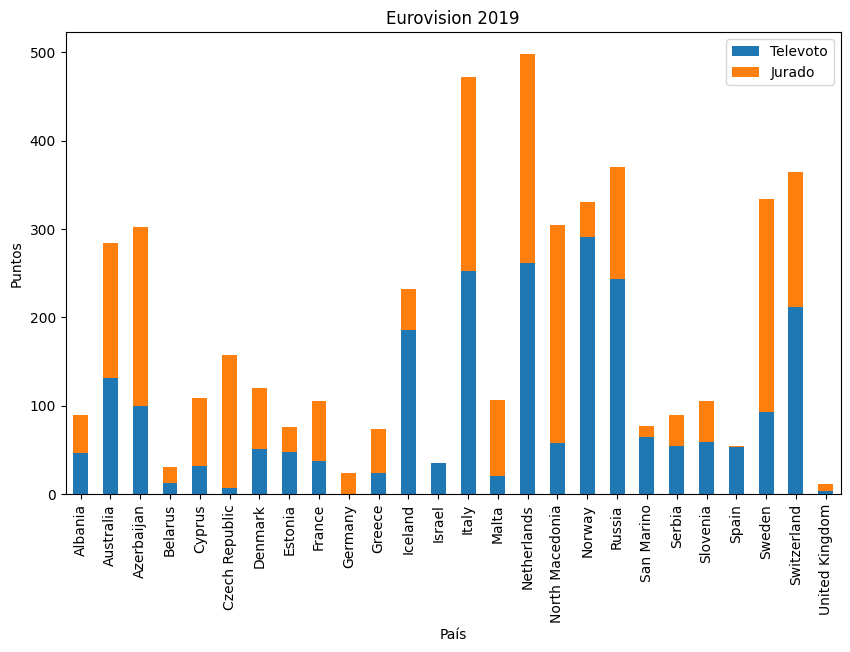

In [228]:
# Filtrar los datos para la final y los años deseados
df_final = df2[df2['round'] == 'final']
df_final = df_final[(df_final['year'] >= 2016) & (df_final['year'] <= 2019)]

# Crear un gráfico apilado para cada año
for year in range(2016, 2020):
    df_year = df_final[df_final['year'] == year]
    df_country = df_year.groupby(['To']).sum()[['tele_points', 'jury_points']]
    
    fig, ax = plt.subplots(figsize=(10, 6))
    df_country.plot(kind='bar', stacked=True, ax=ax)
    ax.set_title(f'Eurovision {year}')
    ax.set_xlabel('País')
    ax.set_ylabel('Puntos')
    ax.legend(['Televoto', 'Jurado'])
    
plt.show()


# Comprobaciones


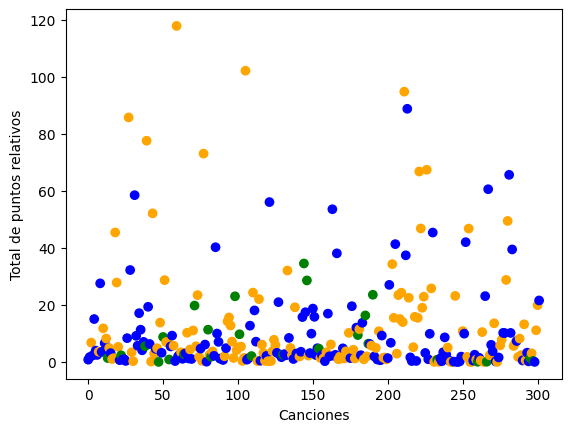

In [246]:
# Filtrar las filas donde "final_total_points" no sea "-" y "rv" no sea "-"
df1 = df1[(df1["final_total_points"] != "-") & (df1["rv"] != "-")]

# Convertir las columnas a tipo numérico
df1["final_total_points"] = pd.to_numeric(df1["final_total_points"])
df1["rv"] = pd.to_numeric(df1["rv"])

# Crear una columna con el valor de "final_total_points" multiplicado por "relative points"
df1["total_points_rel"] = df1["final_total_points"] * df1["rv"]

# Definir los colores de los puntos según el género
colors = {'Female': 'blue', 'Male': 'orange', 'Mix': 'green'}

# Crear la gráfica de dispersión
fig, ax = plt.subplots()
ax.scatter(range(len(df1)), df1["total_points_rel"], c=df1["gender"].map(colors))

ax.set_xlabel('Canciones')
ax.set_ylabel('Total de puntos relativos')

plt.show()


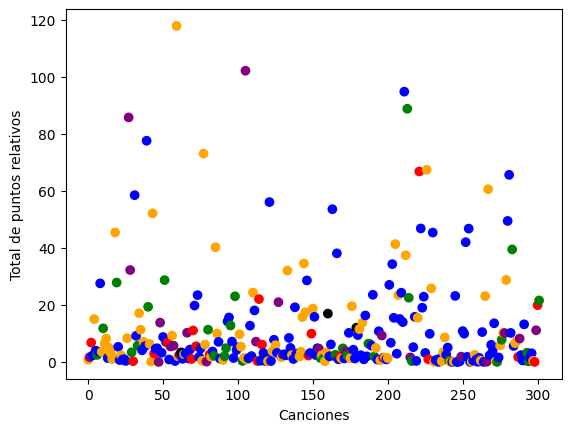

In [230]:
# Filtrar las filas donde "final_total_points" no sea "-" y "rv" no sea "-"
df1 = df1[(df1["final_total_points"] != "-") & (df1["rv"] != "-")]

# Convertir las columnas a tipo numérico
df1["final_total_points"] = pd.to_numeric(df1["final_total_points"])
df1["rv"] = pd.to_numeric(df1["rv"])

# Crear una columna con el valor de "final_total_points" multiplicado por "relative points"
df1["total_points_rel"] = df1["final_total_points"] * df1["rv"]

# Definir los colores de los puntos según el estilo
colors = {'Pop': 'blue', 'Ballad': 'orange', 'Dance': 'green', 'Rock': 'red', 'Traditional': 'purple', 'Opera': 'black'}

# Crear la gráfica de dispersión
fig, ax = plt.subplots()
ax.scatter(range(len(df1)), df1["total_points_rel"], c=df1["style"].map(colors))

ax.set_xlabel('Canciones')
ax.set_ylabel('Total de puntos relativos')

plt.show()

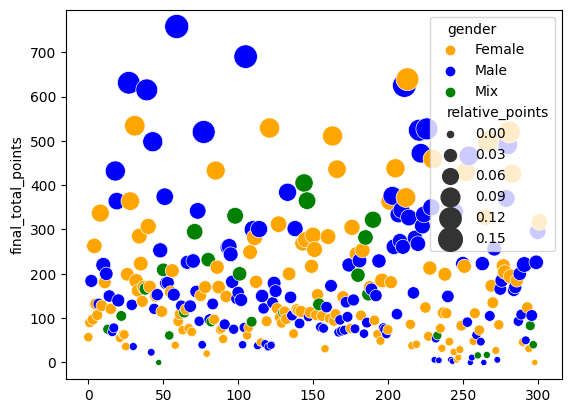

In [ ]:
# definir los colores de cada género
colors = {'Male': 'blue', 'Female': 'orange', 'Mix': 'green'}

# crear el gráfico de dispersión con los colores según el género
sns.scatterplot(x = range(len(df1)), y='final_total_points', data=df1, hue='gender', palette=colors, size='relative_points', sizes=(20, 300))

# mostrar el gráfico
plt.show()


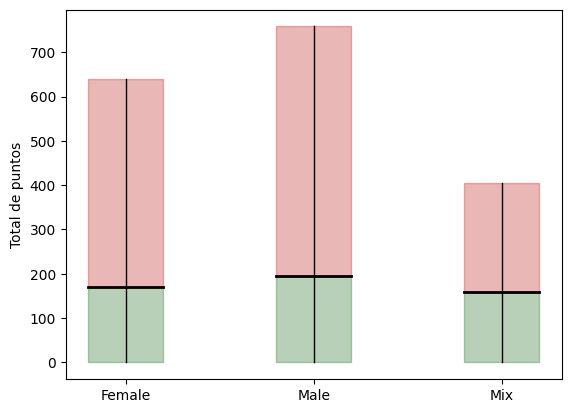

In [ ]:

df_gender = df1[['gender', 'final_total_points']].groupby('gender')

# Calculamos los valores mínimo, máximo, y la media de puntos para cada género
mins = df_gender.min().values.flatten()
maxs = df_gender.max().values.flatten()
means = df_gender.mean().values.flatten()

# Creamos la figura
fig, ax = plt.subplots()

# Dibujamos las velas para cada género
for i, gender in enumerate(df_gender.groups):
    ax.plot([i, i], [mins[i], maxs[i]], color='k', lw=1)
    ax.plot([i-0.2, i+0.2], [means[i], means[i]], color='k', lw=2)
    ax.fill_between([i-0.2, i+0.2], [mins[i], mins[i]], [maxs[i], maxs[i]], color='grey', alpha=0.2)
    ax.fill_between([i-0.2, i+0.2], [means[i], means[i]], [maxs[i], maxs[i]], color='red', alpha=0.2)
    ax.fill_between([i-0.2, i+0.2], [mins[i], mins[i]], [means[i], means[i]], color='green', alpha=0.2)

# Configuramos los ejes
ax.set_xticks([0, 1, 2])
ax.set_xticklabels(['Female', 'Male', 'Mix'])
ax.set_ylabel('Total de puntos')

# Mostramos el gráfico
plt.show()


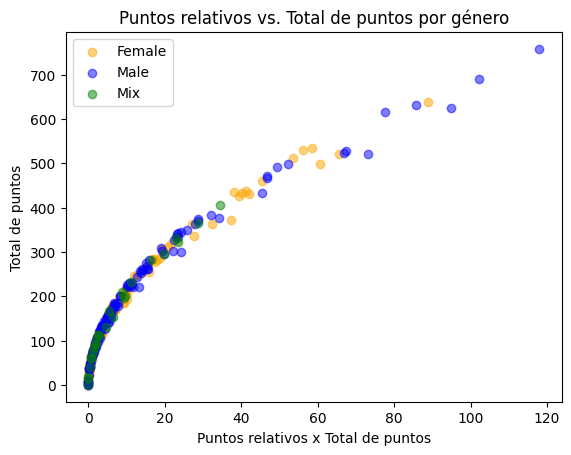

In [ ]:
# Crea una columna con el valor de puntos relativos
df1['relative_points'] = df1['final_total_points'] / df1.groupby('year')['final_total_points'].transform('sum')

# Define los colores para cada género
colors = {'Female': 'orange', 'Male': 'blue', 'Mix': 'green'}

# Crea el gráfico de dispersión
fig, ax = plt.subplots()
for g in df1['gender'].unique():
    group = df1[df1['gender'] == g]
    ax.scatter(group['relative_points'] * group['final_total_points'], group['final_total_points'], color=colors[g], label=g, alpha=0.5)

# Configura el gráfico
ax.set_xlabel('Puntos relativos x Total de puntos')
ax.set_ylabel('Total de puntos')
ax.set_title('Puntos relativos vs. Total de puntos por género')
ax.legend()

# Muestra el gráfico
plt.show()


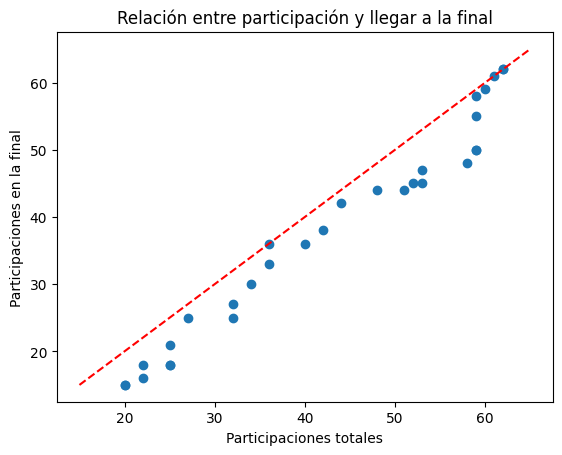

In [ ]:
plt.scatter(participations, participations_final)

# Añadir etiquetas de eje y título
plt.xlabel('Participaciones totales')
plt.ylabel('Participaciones en la final')
plt.title('Relación entre participación y llegar a la final')
plt.plot([15, 65], [15, 65], linestyle='--', color='red')
# Mostrar la gráfica
plt.show()

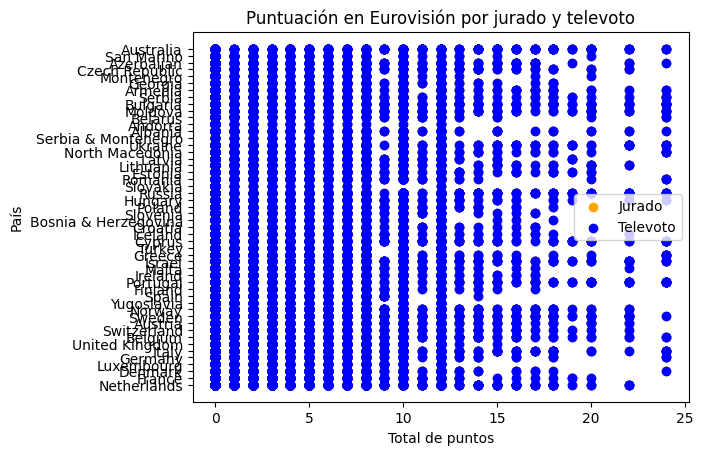

In [ ]:
# crear un subconjunto para jurypoints y otro para telepoints
jurypoints = df2[df2["jury_points"].notnull()]
telepoints = df2[df2["tele_points"].notnull()]

# crear una figura y un eje para el gráfico
fig, ax = plt.subplots()

# trazar los jurypoints como puntos naranjas
ax.scatter(jurypoints["total_points"], jurypoints["To"], color="orange", label="Jurado")

# trazar los telepoints como puntos azules
ax.scatter(telepoints["total_points"], telepoints["To"], color="blue", label="Televoto")

# agregar etiquetas de eje y título
ax.set_xlabel("Total de puntos")
ax.set_ylabel("País")
ax.set_title("Puntuación en Eurovisión por jurado y televoto")

# agregar leyenda
ax.legend()

# mostrar el gráfico
plt.show()



# Conclusiones

Respecto a la primera cuestión, el perfil mayoritario en las últimas ediciones de eurovisión es una propuesta:
* Cantante mujer.
* El estilo de la canción suele ser Pop, en segundo lugar Baladas.
* La clave en la que está escrita las canciones es mayormente indeterminada.
* Con una amplia mayoría el cantante suele estar en solitario.
* No tiene coros de fondo de otras personas.
* No usa o no inervienen instrumentos
* No tiene bailarines de fondo.
* Se presentan muchísimas más canciones en inglés, ya sea entera o parcialmente.

Con respecto a la votación de los países:
* Los paises que más participan en Eurovisión son parte del big five.
* Alguno de los paises que más gozan de poppularidad en Eurovisión son Suecia e Italia.
* Existe un llamativo favoritismo entre Grecia y Chipre, puede ser debido a razones culturales e históricas.
* La disolución de la antigua Yugoslavia dificulta el análisis en algunos de los paises del este de Europa.
* Todas regiones suelen votar más a las regiones de Europa del este, salvo Europa occidental, que vota más a los países de su misma región, después a Europa oriental.
* El factor común de los paises postsoviéticos tienen gran importancia entre ellos, en especial con Ucrania y Rusia. 
* Desde la separación del televoto y el jurado, vemos que hay poco acuerdo entre sí. El televoto concentra más sus puntos en sus paises favoritos, mientras que el jurado desconcentra más sus puntos. 
* Hay un sesgo del voto del jurado a los paises que llevan participando máss tiempo (por ejemplo, Irlanda no ha vuelto a ganar después de quitar el voto del jurado).